### Context ###

Bellabeat is a high-tech company that manufactures health-focused smart products.They offer different smart devices that collect data on activity, sleep, stress, and reproductive health to empower women with knowledge about their own health and habits.

The main focus of this case is to analyze smart devices fitness data and determine how it could help unlock new growth opportunities for Bellabeat. We will focus on one of Bellabeat’s products: Bellabeat app.

The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products

#### Objective ####
Users behaviour analysis drawing conclusion on the features of the app and initiate improvement and end-user communication accordingly. 

Urška Sršen, the Chief Creative Officer of Bellabeat, has requested for you to analyse a publicly available smart device dataset to gain insight into how consumers are using their smart devices. She then wants you to select one Bellabeat product to apply these insights in your presentation. These insights will help guide marketing strategy for the company. You will present your analyss to the Bellabeat executive team along with your high-level recommendation for Bellabeat's marketing strategy. These questions will guide your analyses:

What are some trends in smart device usage?
How could these trends apply to Bellabeat customers?
How could these trends help influence Bellabeat marketing strategy?

#### Data ####
The dataset used for this analysis is the FitBit Fitness Tracker Data and it was made available through Mobius on Kaggle (CC0: Public Domain). This Kaggle data set was created between 03.12.2016-05.12.2016 and contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.

** importing the needed libraries **

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings 
warnings.filterwarnings("ignore")


### Dataset check 

** importing the datasets and check which one can be used for analysis **

In [101]:
daily_activity = pd.read_csv(r"C:\Users\lily\Desktop\IT alapok privát\PRIV DATA SC 1204\Bella project\Fitabase Data 4.12.16-5.12.16\dailyActivity_merged.csv", parse_dates=['ActivityDate'])
# daily_calories = pd.read_csv(r"C:\Users\lily\Desktop\IT alapok privát\PRIV DATA SC 1204\Bella project\Fitabase Data 4.12.16-5.12.16\dailyCalories_merged.csv")
# daily_intensities = pd.read_csv(r"C:\Users\lily\Desktop\IT alapok privát\PRIV DATA SC 1204\Bella project\Fitabase Data 4.12.16-5.12.16\dailyIntensities_merged.csv")
# daily_steps = pd.read_csv(r"C:\Users\lily\Desktop\IT alapok privát\PRIV DATA SC 1204\Bella project\Fitabase Data 4.12.16-5.12.16\dailySteps_merged.csv")
heart_rate = pd.read_csv(r"C:\Users\lily\Desktop\IT alapok privát\PRIV DATA SC 1204\Bella project\Fitabase Data 4.12.16-5.12.16\heartrate_seconds_merged.csv", parse_dates=['Time'])
sleep_day = pd.read_csv(r"C:\Users\lily\Desktop\IT alapok privát\PRIV DATA SC 1204\Bella project\Fitabase Data 4.12.16-5.12.16\sleepDay_merged.csv", parse_dates=['SleepDay'])
# hourly_calories = pd.read_csv(r"C:\Users\lily\Desktop\IT alapok privát\PRIV DATA SC 1204\Bella project\Fitabase Data 4.12.16-5.12.16\hourlyCalories_merged.csv")
# hourly_intensities = pd.read_csv(r"C:\Users\lily\Desktop\IT alapok privát\PRIV DATA SC 1204\Bella project\Fitabase Data 4.12.16-5.12.16\hourlyIntensities_merged.csv")
# hourly_steps = pd.read_csv(r"C:\Users\lily\Desktop\IT alapok privát\PRIV DATA SC 1204\Bella project\Fitabase Data 4.12.16-5.12.16\hourlySteps_merged.csv")
# minute_calories_n = pd.read_csv(r"C:\Users\lily\Desktop\IT alapok privát\PRIV DATA SC 1204\Bella project\Fitabase Data 4.12.16-5.12.16\minuteCaloriesNarrow_merged.csv")
# minute_calories_w = pd.read_csv(r"C:\Users\lily\Desktop\IT alapok privát\PRIV DATA SC 1204\Bella project\Fitabase Data 4.12.16-5.12.16\minuteCaloriesWide_merged.csv")
# minute_intensities_n = pd.read_csv(r"C:\Users\lily\Desktop\IT alapok privát\PRIV DATA SC 1204\Bella project\Fitabase Data 4.12.16-5.12.16\minuteIntensitiesNarrow_merged.csv")
# minute_intensities_w = pd.read_csv(r"C:\Users\lily\Desktop\IT alapok privát\PRIV DATA SC 1204\Bella project\Fitabase Data 4.12.16-5.12.16\minuteIntensitiesWide_merged.csv")
# minute_me_n = pd.read_csv(r"C:\Users\lily\Desktop\IT alapok privát\PRIV DATA SC 1204\Bella project\Fitabase Data 4.12.16-5.12.16\minuteMETsNarrow_merged.csv")
# minute_sleep = pd.read_csv(r"C:\Users\lily\Desktop\IT alapok privát\PRIV DATA SC 1204\Bella project\Fitabase Data 4.12.16-5.12.16\minuteSleep_merged.csv")
# minute_steps_n = pd.read_csv(r"C:\Users\lily\Desktop\IT alapok privát\PRIV DATA SC 1204\Bella project\Fitabase Data 4.12.16-5.12.16\minuteStepsNarrow_merged.csv")
# minute_steps_w = pd.read_csv(r"C:\Users\lily\Desktop\IT alapok privát\PRIV DATA SC 1204\Bella project\Fitabase Data 4.12.16-5.12.16\minuteStepsWide_merged.csv")
# weight_log = pd.read_csv(r"C:\Users\lily\Desktop\IT alapok privát\PRIV DATA SC 1204\Bella project\Fitabase Data 4.12.16-5.12.16\weightLogInfo_merged.csv")

In [102]:
# daily_calories - included in daily_activities
# daily_intensities - included in daily_activities
# daily_steps - included in daily_activities
# all the hourly datasets - hourly not relevant, daily is more efficient
# all the minutes datasets - not relevant, daily is more efficient
# weight_log contains only 8 users data

Even though heart_rate and sleep_day datasets have less entries, but still its worth to merge all of then into one dataset

In [103]:
daily_activity

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [104]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [105]:
daily_activity.rename(columns={'ActivityDate': 'Date'}, inplace=True)

** Changing the type for string as prep for merge **

In [106]:
daily_activity['Date'] = daily_activity['Date'].astype(str)

In [107]:
daily_activity['Id'].nunique()

33

In [108]:
daily_activity['Date'].nunique()

31

In [109]:
daily_activity.groupby('Id')['Date'].count().sort_values(ascending=True).reset_index()

,Id,Date
0,4057192912,4
1,2347167796,18
2,8253242879,19
3,3372868164,20
4,7007744171,26
5,6775888955,26
6,6117666160,28
7,8792009665,29
8,6290855005,29
9,1644430081,30


In [110]:
19/31

0.6129032258064516

61% logged on daily basis

** Before the merge creating new column on total hours and putting the minutes and distances infos to separate tables **

In [111]:
daily_activity['Total_minutes_activity'] = daily_activity['VeryActiveMinutes'] + daily_activity['FairlyActiveMinutes'] + daily_activity['LightlyActiveMinutes'] + daily_activity['SedentaryMinutes']

In [112]:
daily_activity['Total_hours_activity'] = round(daily_activity['Total_minutes_activity'] / 60)

In [113]:
daily_activity.columns

Index(['Id', 'Date', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories',
       'Total_minutes_activity', 'Total_hours_activity'],
      dtype='object')

In [114]:
daily_activity_distances = daily_activity[['LoggedActivitiesDistance', 'VeryActiveDistance','ModeratelyActiveDistance', 'LightActiveDistance','SedentaryActiveDistance']]

In [115]:
daily_activity_distances

,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance
0,0.0,1.88,0.55,6.06,0.00
1,0.0,1.57,0.69,4.71,0.00
2,0.0,2.44,0.40,3.91,0.00
3,0.0,2.14,1.26,2.83,0.00
4,0.0,2.71,0.41,5.04,0.00
...,...,...,...,...,...
935,0.0,1.08,0.20,6.80,0.00
936,0.0,11.10,0.80,6.24,0.05
937,0.0,1.35,0.46,6.28,0.00
938,0.0,13.22,0.41,5.89,0.00


In [116]:
daily_activity_minutes = daily_activity[['VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes']]

In [117]:
daily_activity_minutes

,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
0,25,13,328,728
1,21,19,217,776
2,30,11,181,1218
3,29,34,209,726
4,36,10,221,773
...,...,...,...,...
935,17,4,245,1174
936,73,19,217,1131
937,18,11,224,1187
938,88,12,213,1127


In [118]:
daily_activity.drop(['TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes'], axis=1, inplace=True)

In [119]:
daily_activity

,Id,Date,TotalSteps,TotalDistance,Calories,Total_minutes_activity,Total_hours_activity
0,1503960366,2016-04-12,13162,8.500000,1985,1094,18.0
1,1503960366,2016-04-13,10735,6.970000,1797,1033,17.0
2,1503960366,2016-04-14,10460,6.740000,1776,1440,24.0
3,1503960366,2016-04-15,9762,6.280000,1745,998,17.0
4,1503960366,2016-04-16,12669,8.160000,1863,1040,17.0
...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,2847,1440,24.0
936,8877689391,2016-05-09,20226,18.250000,3710,1440,24.0
937,8877689391,2016-05-10,10733,8.150000,2832,1440,24.0
938,8877689391,2016-05-11,21420,19.559999,3832,1440,24.0


--> 33 women data with period of 31 days but not all of them did the 31 days

### Prepare heart_rate to merge with daily_activity 

In [120]:
heart_rate

,Id,Time,Value
0,2022484408,2016-04-12 07:21:00,97
1,2022484408,2016-04-12 07:21:05,102
2,2022484408,2016-04-12 07:21:10,105
3,2022484408,2016-04-12 07:21:20,103
4,2022484408,2016-04-12 07:21:25,101
...,...,...,...
2483653,8877689391,2016-05-12 02:43:53,57
2483654,8877689391,2016-05-12 02:43:58,56
2483655,8877689391,2016-05-12 02:44:03,55
2483656,8877689391,2016-05-12 02:44:18,55


In [121]:
heart_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Id      int64         
 1   Time    datetime64[ns]
 2   Value   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 56.8 MB


In [122]:
heart_rate['Id'].nunique()

14

Time column needs to be converted to datetime and dataset melted for day instead of minute

In [123]:
heart_rate['Time'] = heart_rate['Time'].dt.date

In [124]:
heart_rate['Time'] = heart_rate['Time'].astype(str)

In [125]:
heart_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Time    object
 2   Value   int64 
dtypes: int64(2), object(1)
memory usage: 56.8+ MB


In [126]:
daily_heart_rate_ = heart_rate.groupby(['Id', 'Time'])['Value'].mean().reset_index()

In [127]:
daily_heart_rate = pd.DataFrame(daily_heart_rate_)

In [128]:
daily_heart_rate

,Id,Time,Value
0,2022484408,2016-04-12,75.804177
1,2022484408,2016-04-13,80.337584
2,2022484408,2016-04-14,72.628597
3,2022484408,2016-04-15,80.437382
4,2022484408,2016-04-16,75.960547
...,...,...,...
329,8877689391,2016-05-08,72.550523
330,8877689391,2016-05-09,89.615738
331,8877689391,2016-05-10,71.544377
332,8877689391,2016-05-11,89.149122


### merge with daily_activity

In [129]:
df3 = pd.merge(daily_activity, daily_heart_rate, left_on=['Id', 'Date'], right_on=['Id', 'Time'], how='outer', indicator=True)

In [130]:
df3['_merge'].nunique()

2

In [131]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Id                      940 non-null    int64   
 1   Date                    940 non-null    object  
 2   TotalSteps              940 non-null    int64   
 3   TotalDistance           940 non-null    float64 
 4   Calories                940 non-null    int64   
 5   Total_minutes_activity  940 non-null    int64   
 6   Total_hours_activity    940 non-null    float64 
 7   Time                    334 non-null    object  
 8   Value                   334 non-null    float64 
 9   _merge                  940 non-null    category
dtypes: category(1), float64(3), int64(4), object(2)
memory usage: 67.3+ KB


### reorder, rename, replace

In [132]:
df3.columns

Index(['Id', 'Date', 'TotalSteps', 'TotalDistance', 'Calories',
       'Total_minutes_activity', 'Total_hours_activity', 'Time', 'Value',
       '_merge'],
      dtype='object')

In [133]:
df3

,Id,Date,TotalSteps,TotalDistance,Calories,Total_minutes_activity,Total_hours_activity,Time,Value,_merge
0,1503960366,2016-04-12,13162,8.500000,1985,1094,18.0,NaN,NaN,left_only
1,1503960366,2016-04-13,10735,6.970000,1797,1033,17.0,NaN,NaN,left_only
2,1503960366,2016-04-14,10460,6.740000,1776,1440,24.0,NaN,NaN,left_only
3,1503960366,2016-04-15,9762,6.280000,1745,998,17.0,NaN,NaN,left_only
4,1503960366,2016-04-16,12669,8.160000,1863,1040,17.0,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,2847,1440,24.0,2016-05-08,72.550523,both
936,8877689391,2016-05-09,20226,18.250000,3710,1440,24.0,2016-05-09,89.615738,both
937,8877689391,2016-05-10,10733,8.150000,2832,1440,24.0,2016-05-10,71.544377,both
938,8877689391,2016-05-11,21420,19.559999,3832,1440,24.0,2016-05-11,89.149122,both


In [134]:
df3.rename(columns={'_merge':'Heart_rate_merge', 'Value':'Heart_beat'}, inplace=True)

In [135]:
df3

,Id,Date,TotalSteps,TotalDistance,Calories,Total_minutes_activity,Total_hours_activity,Time,Heart_beat,Heart_rate_merge
0,1503960366,2016-04-12,13162,8.500000,1985,1094,18.0,NaN,NaN,left_only
1,1503960366,2016-04-13,10735,6.970000,1797,1033,17.0,NaN,NaN,left_only
2,1503960366,2016-04-14,10460,6.740000,1776,1440,24.0,NaN,NaN,left_only
3,1503960366,2016-04-15,9762,6.280000,1745,998,17.0,NaN,NaN,left_only
4,1503960366,2016-04-16,12669,8.160000,1863,1040,17.0,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,2847,1440,24.0,2016-05-08,72.550523,both
936,8877689391,2016-05-09,20226,18.250000,3710,1440,24.0,2016-05-09,89.615738,both
937,8877689391,2016-05-10,10733,8.150000,2832,1440,24.0,2016-05-10,71.544377,both
938,8877689391,2016-05-11,21420,19.559999,3832,1440,24.0,2016-05-11,89.149122,both


In [136]:
df3['Heart_rate_merge'].replace({'left_only':'heart_rate_only', 'both': 'daily_act_and_heart_rate'}, inplace = True)

In [137]:
df3

,Id,Date,TotalSteps,TotalDistance,Calories,Total_minutes_activity,Total_hours_activity,Time,Heart_beat,Heart_rate_merge
0,1503960366,2016-04-12,13162,8.500000,1985,1094,18.0,NaN,NaN,heart_rate_only
1,1503960366,2016-04-13,10735,6.970000,1797,1033,17.0,NaN,NaN,heart_rate_only
2,1503960366,2016-04-14,10460,6.740000,1776,1440,24.0,NaN,NaN,heart_rate_only
3,1503960366,2016-04-15,9762,6.280000,1745,998,17.0,NaN,NaN,heart_rate_only
4,1503960366,2016-04-16,12669,8.160000,1863,1040,17.0,NaN,NaN,heart_rate_only
...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,2847,1440,24.0,2016-05-08,72.550523,daily_act_and_heart_rate
936,8877689391,2016-05-09,20226,18.250000,3710,1440,24.0,2016-05-09,89.615738,daily_act_and_heart_rate
937,8877689391,2016-05-10,10733,8.150000,2832,1440,24.0,2016-05-10,71.544377,daily_act_and_heart_rate
938,8877689391,2016-05-11,21420,19.559999,3832,1440,24.0,2016-05-11,89.149122,daily_act_and_heart_rate


### prepare sleep_day to merge with daily_activity

In [138]:
sleep_day

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712
...,...,...,...,...,...
408,8792009665,2016-04-30,1,343,360
409,8792009665,2016-05-01,1,503,527
410,8792009665,2016-05-02,1,415,423
411,8792009665,2016-05-03,1,516,545


In [139]:
sleep_day['SleepDay'].nunique()

31

In [140]:
sleep_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  413 non-null    int64         
 1   SleepDay            413 non-null    datetime64[ns]
 2   TotalSleepRecords   413 non-null    int64         
 3   TotalMinutesAsleep  413 non-null    int64         
 4   TotalTimeInBed      413 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 16.3 KB


In [141]:
sleep_day['SleepDay'] = sleep_day['SleepDay'].astype(str)

In [142]:
sleep_day['SleepDay'].unique()

array(['2016-04-12', '2016-04-13', '2016-04-15', '2016-04-16',
       '2016-04-17', '2016-04-19', '2016-04-20', '2016-04-21',
       '2016-04-23', '2016-04-24', '2016-04-25', '2016-04-26',
       '2016-04-28', '2016-04-29', '2016-04-30', '2016-05-01',
       '2016-05-02', '2016-05-03', '2016-05-05', '2016-05-06',
       '2016-05-07', '2016-05-08', '2016-05-09', '2016-05-10',
       '2016-05-11', '2016-04-14', '2016-04-22', '2016-04-27',
       '2016-05-04', '2016-05-12', '2016-04-18'], dtype=object)

the 24 users not used daily

In [143]:
sleep_day['Id'].nunique()

24

In [144]:
sleep_day['TotalHoursAsleep'] = round(sleep_day['TotalMinutesAsleep'] / 60)

In [145]:
sleep_day['TotalHoursInBed'] = round(sleep_day['TotalTimeInBed'] /60)

In [146]:
df4 = pd.merge(df3, sleep_day, left_on=['Id', 'Date'], right_on=['Id', 'SleepDay'], how='outer', indicator=True)

In [147]:
df4

,Id,Date,TotalSteps,TotalDistance,Calories,Total_minutes_activity,Total_hours_activity,Time,Heart_beat,Heart_rate_merge,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalHoursAsleep,TotalHoursInBed,_merge
0,1503960366,2016-04-12,13162,8.500000,1985,1094,18.0,NaN,NaN,heart_rate_only,2016-04-12,1.0,327.0,346.0,5.0,6.0,both
1,1503960366,2016-04-13,10735,6.970000,1797,1033,17.0,NaN,NaN,heart_rate_only,2016-04-13,2.0,384.0,407.0,6.0,7.0,both
2,1503960366,2016-04-14,10460,6.740000,1776,1440,24.0,NaN,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,1503960366,2016-04-15,9762,6.280000,1745,998,17.0,NaN,NaN,heart_rate_only,2016-04-15,1.0,412.0,442.0,7.0,7.0,both
4,1503960366,2016-04-16,12669,8.160000,1863,1040,17.0,NaN,NaN,heart_rate_only,2016-04-16,2.0,340.0,367.0,6.0,6.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,8877689391,2016-05-08,10686,8.110000,2847,1440,24.0,2016-05-08,72.550523,daily_act_and_heart_rate,NaN,NaN,NaN,NaN,NaN,NaN,left_only
939,8877689391,2016-05-09,20226,18.250000,3710,1440,24.0,2016-05-09,89.615738,daily_act_and_heart_rate,NaN,NaN,NaN,NaN,NaN,NaN,left_only
940,8877689391,2016-05-10,10733,8.150000,2832,1440,24.0,2016-05-10,71.544377,daily_act_and_heart_rate,NaN,NaN,NaN,NaN,NaN,NaN,left_only
941,8877689391,2016-05-11,21420,19.559999,3832,1440,24.0,2016-05-11,89.149122,daily_act_and_heart_rate,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [148]:
df4['_merge'].nunique()

2

In [149]:
df4 = df4.drop_duplicates()

In [150]:
df4

,Id,Date,TotalSteps,TotalDistance,Calories,Total_minutes_activity,Total_hours_activity,Time,Heart_beat,Heart_rate_merge,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalHoursAsleep,TotalHoursInBed,_merge
0,1503960366,2016-04-12,13162,8.500000,1985,1094,18.0,NaN,NaN,heart_rate_only,2016-04-12,1.0,327.0,346.0,5.0,6.0,both
1,1503960366,2016-04-13,10735,6.970000,1797,1033,17.0,NaN,NaN,heart_rate_only,2016-04-13,2.0,384.0,407.0,6.0,7.0,both
2,1503960366,2016-04-14,10460,6.740000,1776,1440,24.0,NaN,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,1503960366,2016-04-15,9762,6.280000,1745,998,17.0,NaN,NaN,heart_rate_only,2016-04-15,1.0,412.0,442.0,7.0,7.0,both
4,1503960366,2016-04-16,12669,8.160000,1863,1040,17.0,NaN,NaN,heart_rate_only,2016-04-16,2.0,340.0,367.0,6.0,6.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,8877689391,2016-05-08,10686,8.110000,2847,1440,24.0,2016-05-08,72.550523,daily_act_and_heart_rate,NaN,NaN,NaN,NaN,NaN,NaN,left_only
939,8877689391,2016-05-09,20226,18.250000,3710,1440,24.0,2016-05-09,89.615738,daily_act_and_heart_rate,NaN,NaN,NaN,NaN,NaN,NaN,left_only
940,8877689391,2016-05-10,10733,8.150000,2832,1440,24.0,2016-05-10,71.544377,daily_act_and_heart_rate,NaN,NaN,NaN,NaN,NaN,NaN,left_only
941,8877689391,2016-05-11,21420,19.559999,3832,1440,24.0,2016-05-11,89.149122,daily_act_and_heart_rate,NaN,NaN,NaN,NaN,NaN,NaN,left_only


### reorder, rename, replace

In [151]:
df4.columns

Index(['Id', 'Date', 'TotalSteps', 'TotalDistance', 'Calories',
       'Total_minutes_activity', 'Total_hours_activity', 'Time', 'Heart_beat',
       'Heart_rate_merge', 'SleepDay', 'TotalSleepRecords',
       'TotalMinutesAsleep', 'TotalTimeInBed', 'TotalHoursAsleep',
       'TotalHoursInBed', '_merge'],
      dtype='object')

In [152]:
new_col2=['Id', 'Date', 'TotalSteps', 'TotalDistance', 'Calories',
       'Total_minutes_activity', 'Total_hours_activity',
       'Heart_beat', 'Heart_rate_merge', 'TotalHoursAsleep',
       'TotalHoursInBed', 'SleepDay', 'TotalSleepRecords',
       'TotalMinutesAsleep', 'TotalTimeInBed', '_merge']

In [153]:
df4 = df4[new_col2]

In [154]:
df4.rename(columns= {'_merge':'sleep_day_merge'}, inplace=True)

In [155]:
df4['sleep_day_merge'].replace({'left_only':'sleep_day_only', 'both': 'df3_and_sleep_day'}, inplace = True)

In [156]:
df4

,Id,Date,TotalSteps,TotalDistance,Calories,Total_minutes_activity,Total_hours_activity,Heart_beat,Heart_rate_merge,TotalHoursAsleep,TotalHoursInBed,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,sleep_day_merge
0,1503960366,2016-04-12,13162,8.500000,1985,1094,18.0,NaN,heart_rate_only,5.0,6.0,2016-04-12,1.0,327.0,346.0,df3_and_sleep_day
1,1503960366,2016-04-13,10735,6.970000,1797,1033,17.0,NaN,heart_rate_only,6.0,7.0,2016-04-13,2.0,384.0,407.0,df3_and_sleep_day
2,1503960366,2016-04-14,10460,6.740000,1776,1440,24.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
3,1503960366,2016-04-15,9762,6.280000,1745,998,17.0,NaN,heart_rate_only,7.0,7.0,2016-04-15,1.0,412.0,442.0,df3_and_sleep_day
4,1503960366,2016-04-16,12669,8.160000,1863,1040,17.0,NaN,heart_rate_only,6.0,6.0,2016-04-16,2.0,340.0,367.0,df3_and_sleep_day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,8877689391,2016-05-08,10686,8.110000,2847,1440,24.0,72.550523,daily_act_and_heart_rate,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
939,8877689391,2016-05-09,20226,18.250000,3710,1440,24.0,89.615738,daily_act_and_heart_rate,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
940,8877689391,2016-05-10,10733,8.150000,2832,1440,24.0,71.544377,daily_act_and_heart_rate,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
941,8877689391,2016-05-11,21420,19.559999,3832,1440,24.0,89.149122,daily_act_and_heart_rate,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only


### Sanity checks

In [157]:
df4.isnull().sum()

Id                          0
Date                        0
TotalSteps                  0
TotalDistance               0
Calories                    0
Total_minutes_activity      0
Total_hours_activity        0
Heart_beat                606
Heart_rate_merge            0
TotalHoursAsleep          530
TotalHoursInBed           530
SleepDay                  530
TotalSleepRecords         530
TotalMinutesAsleep        530
TotalTimeInBed            530
sleep_day_merge             0
dtype: int64

In [158]:
print(df4.isna().any().any())

True


In [159]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 940 entries, 0 to 942
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Id                      940 non-null    int64   
 1   Date                    940 non-null    object  
 2   TotalSteps              940 non-null    int64   
 3   TotalDistance           940 non-null    float64 
 4   Calories                940 non-null    int64   
 5   Total_minutes_activity  940 non-null    int64   
 6   Total_hours_activity    940 non-null    float64 
 7   Heart_beat              334 non-null    float64 
 8   Heart_rate_merge        940 non-null    category
 9   TotalHoursAsleep        410 non-null    float64 
 10  TotalHoursInBed         410 non-null    float64 
 11  SleepDay                410 non-null    object  
 12  TotalSleepRecords       410 non-null    float64 
 13  TotalMinutesAsleep      410 non-null    float64 
 14  TotalTimeInBed          410 non

In [160]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 940 entries, 0 to 942
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Id                      940 non-null    int64   
 1   Date                    940 non-null    object  
 2   TotalSteps              940 non-null    int64   
 3   TotalDistance           940 non-null    float64 
 4   Calories                940 non-null    int64   
 5   Total_minutes_activity  940 non-null    int64   
 6   Total_hours_activity    940 non-null    float64 
 7   Heart_beat              334 non-null    float64 
 8   Heart_rate_merge        940 non-null    category
 9   TotalHoursAsleep        410 non-null    float64 
 10  TotalHoursInBed         410 non-null    float64 
 11  SleepDay                410 non-null    object  
 12  TotalSleepRecords       410 non-null    float64 
 13  TotalMinutesAsleep      410 non-null    float64 
 14  TotalTimeInBed          410 non

In [161]:
df4['Date'] = pd.to_datetime(df4['Date'])

### Checking the relevant variables & data consistency

In [162]:
df4.describe()

,Id,Date,TotalSteps,TotalDistance,Calories,Total_minutes_activity,Total_hours_activity,Heart_beat,TotalHoursAsleep,TotalHoursInBed,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,334.000000,410.000000,410.000000,410.000000,410.000000,410.000000
mean,4.855407e+09,2016-04-26 06:53:37.021276672,7637.910638,5.489702,2303.609574,1218.753191,20.313830,78.614059,6.990244,7.617073,1.119512,419.173171,458.482927
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,2.000000,0.000000,59.377175,1.000000,1.000000,1.000000,58.000000,61.000000
25%,2.320127e+09,2016-04-19 00:00:00,3789.750000,2.620000,1828.500000,989.750000,16.000000,70.465679,6.000000,7.000000,1.000000,361.000000,403.750000
50%,4.445115e+09,2016-04-26 00:00:00,7405.500000,5.245000,2134.000000,1440.000000,24.000000,77.494179,7.000000,8.000000,1.000000,432.500000,463.000000
75%,6.962181e+09,2016-05-04 00:00:00,10727.000000,7.712500,2793.250000,1440.000000,24.000000,84.933171,8.000000,9.000000,1.000000,490.000000,526.000000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,28.030001,4900.000000,1440.000000,24.000000,109.789625,13.000000,16.000000,3.000000,796.000000,961.000000
std,2.424805e+09,NaN,5087.150742,3.924606,718.166862,265.931767,4.437283,10.613254,1.990172,2.141042,0.346636,118.635918,127.455140


### checking for steps

In [163]:
zero_steps = df4[df4['TotalSteps'] ==0]
zero_steps

,Id,Date,TotalSteps,TotalDistance,Calories,Total_minutes_activity,Total_hours_activity,Heart_beat,Heart_rate_merge,TotalHoursAsleep,TotalHoursInBed,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,sleep_day_merge
30,1503960366,2016-05-12,0,0.0,0,1440,24.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
104,1844505072,2016-04-24,0,0.0,1347,1440,24.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
105,1844505072,2016-04-25,0,0.0,1347,1440,24.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
106,1844505072,2016-04-26,0,0.0,1347,1440,24.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
112,1844505072,2016-05-02,0,0.0,1348,1440,24.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,8792009665,2016-05-06,0,0.0,1688,1440,24.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
908,8792009665,2016-05-07,0,0.0,1688,1440,24.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
909,8792009665,2016-05-08,0,0.0,1688,1440,24.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
910,8792009665,2016-05-09,0,0.0,1688,1440,24.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only


In [164]:
zero_steps['Id'].nunique()

15

In [165]:
zero_steps.groupby('Id')['Date'].count().sort_values(ascending=True)

Id
1503960366     1
4057192912     1
4702921684     1
7086361926     1
8253242879     1
8583815059     1
5577150313     2
7007744171     2
6117666160     5
6290855005     5
6775888955     9
1844505072    10
8792009665    10
1927972279    14
4020332650    14
Name: Date, dtype: int64

In [166]:
zero_steps['Date'].nunique()

30

 --> 15 persons during total 30 days did not enter any steps: some of them only 1 days, but there are people who did not enter any value for 14 days 

### checking for distance

In [167]:
zero_distance = df4[df4['TotalDistance'] == 0]
zero_distance 

,Id,Date,TotalSteps,TotalDistance,Calories,Total_minutes_activity,Total_hours_activity,Heart_beat,Heart_rate_merge,TotalHoursAsleep,TotalHoursInBed,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,sleep_day_merge
30,1503960366,2016-05-12,0,0.0,0,1440,24.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
104,1844505072,2016-04-24,0,0.0,1347,1440,24.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
105,1844505072,2016-04-25,0,0.0,1347,1440,24.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
106,1844505072,2016-04-26,0,0.0,1347,1440,24.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
107,1844505072,2016-04-27,4,0.0,1348,1440,24.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,8792009665,2016-05-06,0,0.0,1688,1440,24.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
908,8792009665,2016-05-07,0,0.0,1688,1440,24.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
909,8792009665,2016-05-08,0,0.0,1688,1440,24.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
910,8792009665,2016-05-09,0,0.0,1688,1440,24.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only


In [168]:
zero_distance['Id'].nunique()

15

#### ???????
Why is it equal to the values of zero_steps? 

previous note:  --> 20 persons during total 30 days did not enter any distance value for some days. Majority of them only 1-2 days, but there are people who did not enter any value for more than 15 days

In [169]:
zero_distance.groupby('Id')['Date'].count().sort_values(ascending=True)

Id
1503960366     1
4057192912     1
4702921684     1
7086361926     1
8253242879     1
8583815059     1
5577150313     2
7007744171     2
6117666160     5
6290855005     5
6775888955     9
8792009665    10
1844505072    11
1927972279    14
4020332650    14
Name: Date, dtype: int64

In [170]:
zero_distance['Date'].nunique()

30

### checking for calories

In [171]:
df4[['Calories']].describe() # dataframe with double bracket 

,Calories
count,940.000000
mean,2303.609574
std,718.166862
min,0.000000
25%,1828.500000
50%,2134.000000
75%,2793.250000
max,4900.000000


In [172]:
below1000 = df4[df4['Calories'] < 1000 ]
below1000

,Id,Date,TotalSteps,TotalDistance,Calories,Total_minutes_activity,Total_hours_activity,Heart_beat,Heart_rate_merge,TotalHoursAsleep,TotalHoursInBed,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,sleep_day_merge
30,1503960366,2016-05-12,0,0.00,0,1440,24.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
122,1844505072,2016-05-12,0,0.00,665,711,12.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
264,2347167796,2016-04-29,42,0.03,403,6,0.0,62.869712,daily_act_and_heart_rate,7.0,8.0,2016-04-29,1.0,411.0,473.0,df3_and_sleep_day
345,3977333714,2016-05-11,746,0.50,52,26,0.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
411,4319703577,2016-05-12,17,0.01,257,2,0.0,NaN,heart_rate_only,5.0,5.0,2016-05-12,1.0,302.0,321.0,df3_and_sleep_day
568,5553957443,2016-05-12,3121,2.04,741,284,5.0,64.195323,daily_act_and_heart_rate,7.0,8.0,2016-05-12,1.0,438.0,475.0,df3_and_sleep_day
655,6290855005,2016-05-10,0,0.00,0,1440,24.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
712,6962181067,2016-05-12,3587,2.37,928,240,4.0,75.715741,daily_act_and_heart_rate,9.0,9.0,2016-05-12,1.0,516.0,535.0,df3_and_sleep_day
738,7007744171,2016-05-07,0,0.00,120,111,2.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
819,8253242879,2016-04-30,0,0.00,0,1440,24.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only


In [173]:
below1000.count()

Id                        12
Date                      12
TotalSteps                12
TotalDistance             12
Calories                  12
Total_minutes_activity    12
Total_hours_activity      12
Heart_beat                 3
Heart_rate_merge          12
TotalHoursAsleep           4
TotalHoursInBed            4
SleepDay                   4
TotalSleepRecords          4
TotalMinutesAsleep         4
TotalTimeInBed             4
sleep_day_merge           12
dtype: int64

--> 12 users below 1000 calories

In [174]:
below1000['Id'].nunique()

12

In [175]:
zero_calories = df4[df4['Calories'] ==0]
zero_calories

,Id,Date,TotalSteps,TotalDistance,Calories,Total_minutes_activity,Total_hours_activity,Heart_beat,Heart_rate_merge,TotalHoursAsleep,TotalHoursInBed,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,sleep_day_merge
30,1503960366,2016-05-12,0,0.0,0,1440,24.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
655,6290855005,2016-05-10,0,0.0,0,1440,24.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
819,8253242879,2016-04-30,0,0.0,0,1440,24.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
882,8583815059,2016-05-12,0,0.0,0,1440,24.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only


In [176]:
zero_calories['Id'].nunique()

4

---> they use it more for tracking their calories and not step or distance or sleep

In [177]:
zero_hours = df4[df4['Total_hours_activity'] ==0]
zero_hours

,Id,Date,TotalSteps,TotalDistance,Calories,Total_minutes_activity,Total_hours_activity,Heart_beat,Heart_rate_merge,TotalHoursAsleep,TotalHoursInBed,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,sleep_day_merge
264,2347167796,2016-04-29,42,0.03,403,6,0.0,62.869712,daily_act_and_heart_rate,7.0,8.0,2016-04-29,1.0,411.0,473.0,df3_and_sleep_day
345,3977333714,2016-05-11,746,0.50,52,26,0.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
411,4319703577,2016-05-12,17,0.01,257,2,0.0,NaN,heart_rate_only,5.0,5.0,2016-05-12,1.0,302.0,321.0,df3_and_sleep_day


In [178]:
sleep = df4[df4['TotalHoursAsleep'] > 0]
sleep
# all sleeping entry 410

,Id,Date,TotalSteps,TotalDistance,Calories,Total_minutes_activity,Total_hours_activity,Heart_beat,Heart_rate_merge,TotalHoursAsleep,TotalHoursInBed,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,sleep_day_merge
0,1503960366,2016-04-12,13162,8.50,1985,1094,18.0,NaN,heart_rate_only,5.0,6.0,2016-04-12,1.0,327.0,346.0,df3_and_sleep_day
1,1503960366,2016-04-13,10735,6.97,1797,1033,17.0,NaN,heart_rate_only,6.0,7.0,2016-04-13,2.0,384.0,407.0,df3_and_sleep_day
3,1503960366,2016-04-15,9762,6.28,1745,998,17.0,NaN,heart_rate_only,7.0,7.0,2016-04-15,1.0,412.0,442.0,df3_and_sleep_day
4,1503960366,2016-04-16,12669,8.16,1863,1040,17.0,NaN,heart_rate_only,6.0,6.0,2016-04-16,2.0,340.0,367.0,df3_and_sleep_day
5,1503960366,2016-04-17,9705,6.48,1728,761,13.0,NaN,heart_rate_only,12.0,12.0,2016-04-17,1.0,700.0,712.0,df3_and_sleep_day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,8792009665,2016-04-30,7174,4.59,2896,1080,18.0,81.464642,daily_act_and_heart_rate,6.0,6.0,2016-04-30,1.0,343.0,360.0,df3_and_sleep_day
902,8792009665,2016-05-01,1619,1.04,1962,913,15.0,67.810171,daily_act_and_heart_rate,8.0,9.0,2016-05-01,1.0,503.0,527.0,df3_and_sleep_day
903,8792009665,2016-05-02,1831,1.17,2015,1017,17.0,67.403919,daily_act_and_heart_rate,7.0,7.0,2016-05-02,1.0,415.0,423.0,df3_and_sleep_day
904,8792009665,2016-05-03,2421,1.55,2297,895,15.0,74.371940,daily_act_and_heart_rate,9.0,9.0,2016-05-03,1.0,516.0,545.0,df3_and_sleep_day


In [179]:
sleep = df4[df4['TotalHoursAsleep'] < 3]
sleep

,Id,Date,TotalSteps,TotalDistance,Calories,Total_minutes_activity,Total_hours_activity,Heart_beat,Heart_rate_merge,TotalHoursAsleep,TotalHoursInBed,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,sleep_day_merge
79,1644430081,2016-04-29,3176,2.31,2498,1313,22.0,NaN,heart_rate_only,2.0,2.0,2016-04-29,1.0,119.0,127.0,df3_and_sleep_day
80,1644430081,2016-04-30,18213,13.24,3846,1298,22.0,NaN,heart_rate_only,2.0,2.0,2016-04-30,1.0,124.0,142.0,df3_and_sleep_day
88,1644430081,2016-05-08,6724,4.89,2987,1286,21.0,NaN,heart_rate_only,2.0,3.0,2016-05-08,1.0,137.0,154.0,df3_and_sleep_day
227,2320127002,2016-04-23,5079,3.42,1804,1371,23.0,NaN,heart_rate_only,1.0,1.0,2016-04-23,1.0,61.0,69.0,df3_and_sleep_day
350,4020332650,2016-04-16,1982,1.42,3051,1363,23.0,100.903320,daily_act_and_heart_rate,1.0,1.0,2016-04-16,1.0,77.0,77.0,df3_and_sleep_day
390,4319703577,2016-04-21,3702,2.48,1792,1299,22.0,NaN,heart_rate_only,1.0,1.0,2016-04-21,1.0,59.0,65.0,df3_and_sleep_day
418,4388161847,2016-04-18,11009,9.10,3274,1291,22.0,81.490995,daily_act_and_heart_rate,2.0,2.0,2016-04-18,1.0,99.0,104.0,df3_and_sleep_day
422,4388161847,2016-04-22,12139,9.34,3544,1267,21.0,73.277199,daily_act_and_heart_rate,1.0,1.0,2016-04-22,1.0,82.0,85.0,df3_and_sleep_day
440,4388161847,2016-05-09,10218,7.86,3013,1303,22.0,64.051717,daily_act_and_heart_rate,1.0,1.0,2016-05-09,1.0,62.0,65.0,df3_and_sleep_day
449,4445114986,2016-04-17,2268,1.52,1933,1333,22.0,NaN,heart_rate_only,2.0,2.0,2016-04-17,1.0,98.0,107.0,df3_and_sleep_day


In [180]:
sleep['TotalHoursAsleep'].count()

19

In [181]:
19/410

0.046341463414634146

### Calorie & Step & Heat beat  & Sleep check ###

In [182]:
df4.columns

Index(['Id', 'Date', 'TotalSteps', 'TotalDistance', 'Calories',
       'Total_minutes_activity', 'Total_hours_activity', 'Heart_beat',
       'Heart_rate_merge', 'TotalHoursAsleep', 'TotalHoursInBed', 'SleepDay',
       'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed',
       'sleep_day_merge'],
      dtype='object')

In [183]:
sport = df4[(df4['Calories'] > 0) & ((df4['TotalSteps'] == 0) | (df4['TotalDistance'] == 0))]

In [184]:
sport

,Id,Date,TotalSteps,TotalDistance,Calories,Total_minutes_activity,Total_hours_activity,Heart_beat,Heart_rate_merge,TotalHoursAsleep,TotalHoursInBed,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,sleep_day_merge
104,1844505072,2016-04-24,0,0.0,1347,1440,24.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
105,1844505072,2016-04-25,0,0.0,1347,1440,24.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
106,1844505072,2016-04-26,0,0.0,1347,1440,24.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
107,1844505072,2016-04-27,4,0.0,1348,1440,24.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
112,1844505072,2016-05-02,0,0.0,1348,1440,24.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,8792009665,2016-05-06,0,0.0,1688,1440,24.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
908,8792009665,2016-05-07,0,0.0,1688,1440,24.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
909,8792009665,2016-05-08,0,0.0,1688,1440,24.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
910,8792009665,2016-05-09,0,0.0,1688,1440,24.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only


In [185]:
sport['Id'].nunique()

12

12 users logged values for calories, but no values for step or distance → assumption: calories tracking during sport activities.

In [186]:
calories = round(df4.groupby('Id')[['Calories', 'Heart_beat', 'TotalSteps', 'TotalHoursAsleep', 'Date']].mean().sort_values(by='Calories', ascending=False).reset_index().head(10))

In [187]:
calories 

,Id,Calories,Heart_beat,TotalSteps,TotalHoursAsleep,Date
0,8378563200,3437.0,NaN,8718.0,7.0,2016-04-27 00:00:00
1,8877689391,3420.0,82.0,16040.0,NaN,2016-04-27 00:00:00
2,5577150313,3360.0,69.0,8304.0,7.0,2016-04-26 12:00:00
3,4388161847,3094.0,66.0,10814.0,7.0,2016-04-27 00:00:00
4,4702921684,2966.0,NaN,8572.0,7.0,2016-04-27 00:00:00
5,8053475328,2946.0,NaN,14763.0,5.0,2016-04-27 00:00:00
6,1644430081,2811.0,NaN,7283.0,5.0,2016-04-26 12:00:00
7,8583815059,2732.0,NaN,7199.0,NaN,2016-04-27 00:00:00
8,6290855005,2600.0,NaN,5650.0,NaN,2016-04-26 00:00:00
9,7086361926,2566.0,NaN,9372.0,8.0,2016-04-27 00:00:00


### Let's check the weekly trend of the hear beat for these top 10 calorie burners ###

In [188]:
top10calories = [8378563200, 8877689391, 5577150313, 4388161847, 4702921684,8053475328,1644430081, 8583815059,6290855005, 7086361926 ]

In [189]:
calories_trend = df4.loc[df4['Id'].isin(top10calories), ['Id', 'Calories', 'TotalSteps', 'Date']]
calories_trend

,Id,Calories,TotalSteps,Date
62,1644430081,3199,10694,2016-04-12
63,1644430081,2902,8001,2016-04-13
64,1644430081,3226,11037,2016-04-14
65,1644430081,2750,5263,2016-04-15
66,1644430081,3493,15300,2016-04-16
...,...,...,...,...
938,8877689391,2847,10686,2016-05-08
939,8877689391,3710,20226,2016-05-09
940,8877689391,2832,10733,2016-05-10
941,8877689391,3832,21420,2016-05-11


In [190]:
calories_trend.set_index('Date', inplace=True)

In [191]:
weekly_df_cal = calories_trend.resample('W').mean()

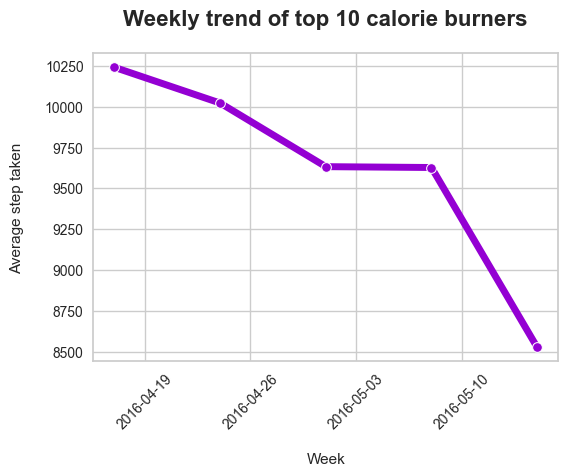

In [284]:
from matplotlib.dates import WeekdayLocator, DateFormatter


plt.figure(figsize=(6, 4))
sns.lineplot(x=weekly_df_cal.index, y='TotalSteps', data=weekly_df_cal, marker='o', linewidth=5, color='darkviolet')

plt.gca().xaxis.set_major_locator(WeekdayLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.title('Weekly trend of top 10 calorie burners', fontdict={'size': 16, 'weight': 'bold'}, pad=20)
plt.xlabel('Week', labelpad=15)
plt.xticks(x=weekly_df_cal.index, rotation=45)
plt.ylabel('Average step taken', labelpad=15)
plt.show()

Those who has the highest average calorie burnt, majority of them did not use the heart_beat feature. Assumption: majority of the top calorie burners usually do some sport and minority is burning the calories by daily steps. 

In [193]:
heart_beat = round(df4.groupby('Id')[['Heart_beat','Calories', 'TotalSteps','Date']].mean().sort_values(by='Heart_beat', ascending=False).reset_index().head(10))

In [194]:
heart_beat 

,Id,Heart_beat,Calories,TotalSteps,Date
0,6775888955,96.0,2132.0,2520.0,2016-04-24 12:00:00
1,7007744171,91.0,2544.0,11323.0,2016-04-24 12:00:00
2,2026352035,88.0,1541.0,5567.0,2016-04-27 00:00:00
3,4020332650,87.0,2386.0,2267.0,2016-04-27 00:00:00
4,6117666160,84.0,2261.0,7047.0,2016-04-25 12:00:00
5,8877689391,82.0,3420.0,16040.0,2016-04-27 00:00:00
6,4558609924,82.0,2033.0,7685.0,2016-04-27 00:00:00
7,2022484408,80.0,2510.0,11371.0,2016-04-27 00:00:00
8,6962181067,78.0,1982.0,9795.0,2016-04-27 00:00:00
9,2347167796,76.0,2043.0,9520.0,2016-04-20 12:00:00


Those who has the highest average heart beat --> doing sport activities - majority of them burning more calories as the daily recommended treshold as of 1800.

### Let's check the weekly trend of the hear beat for these top 10 heart_beat users ###

In [195]:
top10heartbeat= [6775888955, 7007744171, 2026352035, 4020332650, 6117666160, 8877689391, 4558609924, 2022484408, 6962181067, 2347167796]

In [196]:
heart_beat_trend = df4.loc[df4['Id'].isin(top10heartbeat), ['Id','Heart_beat', 'Calories', 'Date']]
heart_beat_trend


,Id,Heart_beat,Calories,Date
154,2022484408,75.804177,2390,2016-04-12
155,2022484408,80.337584,2601,2016-04-13
156,2022484408,72.628597,2312,2016-04-14
157,2022484408,80.437382,2525,2016-04-15
158,2022484408,75.960547,2177,2016-04-16
...,...,...,...,...
938,8877689391,72.550523,2847,2016-05-08
939,8877689391,89.615738,3710,2016-05-09
940,8877689391,71.544377,2832,2016-05-10
941,8877689391,89.149122,3832,2016-05-11


In [197]:
heart_beat_trend['Date'] = pd.to_datetime(heart_beat_trend['Date'])

In [198]:
heart_beat_trend.set_index('Date', inplace=True)

In [199]:
weekly_df = heart_beat_trend.resample('W').mean()

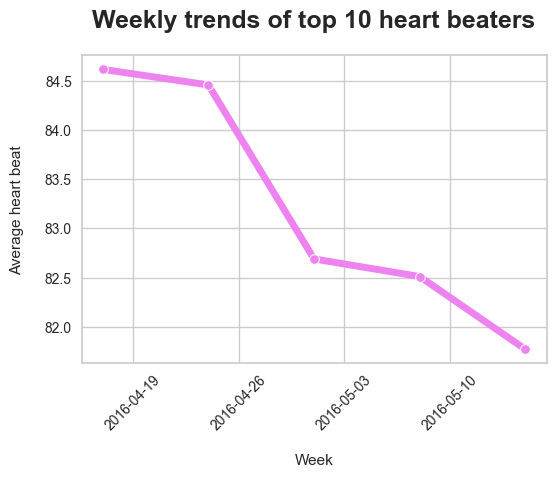

In [282]:
from matplotlib.dates import WeekdayLocator, DateFormatter

plt.figure(figsize=(6,4))
sns.lineplot(x=weekly_df.index, y='Heart_beat', data=weekly_df, marker='o', linewidth=5, color='violet')

plt.gca().xaxis.set_major_locator(WeekdayLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.title('Weekly trends of top 10 heart beaters', fontdict={'size': 18, 'weight': 'bold'}, pad=20)
plt.xlabel('Week', labelpad=15)
plt.xticks(x=weekly_df.index, rotation=45)
plt.ylabel('Average heart beat', labelpad=15)
plt.show()

### Let's check the weekly trend of the hear beat for these top 10 sleepers ###

In [201]:
dfsleep = df4[df4['TotalHoursAsleep'] > 0]

In [202]:
total_hours_asleep = dfsleep.groupby('Id')[['TotalHoursAsleep', 'Heart_beat','Calories', 'Date']].mean().sort_values(by='TotalHoursAsleep', ascending=False).reset_index().head(10)

In [203]:
total_hours_asleep 

,Id,TotalHoursAsleep,Heart_beat,Calories,Date
0,1844505072,11.000000,NaN,1676.333333,2016-04-25 08:00:00.000000000
1,2026352035,8.535714,87.632634,1540.785714,2016-04-27 03:25:42.857142784
2,4319703577,8.000000,NaN,2024.692308,2016-04-27 22:09:13.846153728
3,6117666160,7.944444,82.057550,2460.833333,2016-04-26 16:00:00.000000000
4,5553957443,7.741935,67.774545,1875.677419,2016-04-27 00:00:00.000000000
5,7086361926,7.500000,NaN,2657.625000,2016-04-27 11:00:00.000000000
6,6962181067,7.483871,77.550101,1982.032258,2016-04-27 00:00:00.000000000
7,8792009665,7.400000,72.234672,2299.333333,2016-04-24 04:48:00.000000000
8,2347167796,7.400000,74.230514,1971.333333,2016-04-21 09:36:00.000000000
9,8378563200,7.387097,NaN,3436.580645,2016-04-27 00:00:00.000000000


In [204]:
top10sleepers = [1844505072, 2026352035, 4319703577, 6117666160,5553957443, 7086361926, 6962181067, 8792009665, 2347167796,8378563200 ]

In [205]:
total_hours_asleep_trend  = dfsleep.loc[df4['Id'].isin(top10sleepers), ['Id','TotalHoursAsleep', 'Calories', 'Date']]
total_hours_asleep_trend

,Id,TotalHoursAsleep,Calories,Date
95,1844505072,11.0,1725,2016-04-15
110,1844505072,12.0,1763,2016-04-30
111,1844505072,10.0,1541,2016-05-01
185,2026352035,8.0,1459,2016-04-12
186,2026352035,9.0,1521,2016-04-13
...,...,...,...,...
901,8792009665,6.0,2896,2016-04-30
902,8792009665,8.0,1962,2016-05-01
903,8792009665,7.0,2015,2016-05-02
904,8792009665,9.0,2297,2016-05-03


In [206]:
total_hours_asleep_trend['Date'] = pd.to_datetime(total_hours_asleep_trend['Date'])

In [207]:
total_hours_asleep_trend.set_index('Date', inplace=True)

In [208]:
weekly_df_sleep = total_hours_asleep_trend.resample('W').mean()

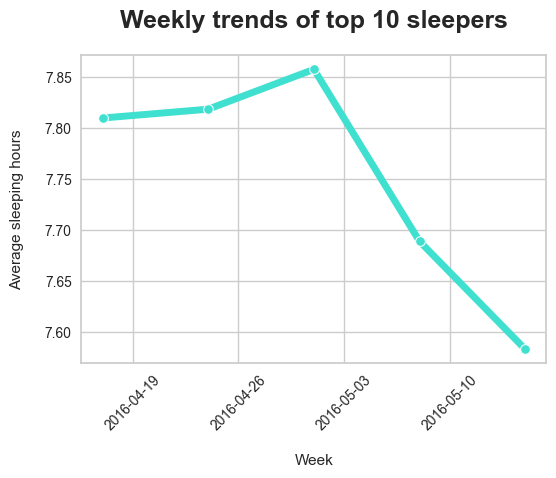

In [283]:
from matplotlib.dates import WeekdayLocator, DateFormatter


plt.figure(figsize=(6,4))
sns.lineplot(x=weekly_df.index, y='TotalHoursAsleep', data=weekly_df_sleep, marker='o', linewidth=5, color='turquoise')

plt.gca().xaxis.set_major_locator(WeekdayLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.title('Weekly trends of top 10 sleepers', fontdict={'size': 18, 'weight': 'bold'}, pad=20)
plt.xlabel('Week', labelpad=15)
plt.xticks(x=weekly_df.index, rotation=45)
plt.ylabel('Average sleeping hours', labelpad=15)
plt.show()

In [210]:
df4['ActivityDate_day'] = df4['Date'].dt.day_name() 

In [211]:
def categorize_day(day):
    if day in ['Saturday', 'Sunday']:
        return 'Weekend'
    else:
        return 'Weekday'
    
df4['Day_of_the_week'] = df4['ActivityDate_day'].apply(categorize_day)

In [212]:
df4

,Id,Date,TotalSteps,TotalDistance,Calories,Total_minutes_activity,Total_hours_activity,Heart_beat,Heart_rate_merge,TotalHoursAsleep,TotalHoursInBed,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,sleep_day_merge,ActivityDate_day,Day_of_the_week
0,1503960366,2016-04-12,13162,8.500000,1985,1094,18.0,NaN,heart_rate_only,5.0,6.0,2016-04-12,1.0,327.0,346.0,df3_and_sleep_day,Tuesday,Weekday
1,1503960366,2016-04-13,10735,6.970000,1797,1033,17.0,NaN,heart_rate_only,6.0,7.0,2016-04-13,2.0,384.0,407.0,df3_and_sleep_day,Wednesday,Weekday
2,1503960366,2016-04-14,10460,6.740000,1776,1440,24.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only,Thursday,Weekday
3,1503960366,2016-04-15,9762,6.280000,1745,998,17.0,NaN,heart_rate_only,7.0,7.0,2016-04-15,1.0,412.0,442.0,df3_and_sleep_day,Friday,Weekday
4,1503960366,2016-04-16,12669,8.160000,1863,1040,17.0,NaN,heart_rate_only,6.0,6.0,2016-04-16,2.0,340.0,367.0,df3_and_sleep_day,Saturday,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,8877689391,2016-05-08,10686,8.110000,2847,1440,24.0,72.550523,daily_act_and_heart_rate,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only,Sunday,Weekend
939,8877689391,2016-05-09,20226,18.250000,3710,1440,24.0,89.615738,daily_act_and_heart_rate,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only,Monday,Weekday
940,8877689391,2016-05-10,10733,8.150000,2832,1440,24.0,71.544377,daily_act_and_heart_rate,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only,Tuesday,Weekday
941,8877689391,2016-05-11,21420,19.559999,3832,1440,24.0,89.149122,daily_act_and_heart_rate,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only,Wednesday,Weekday


Reordering the columns and dropping

In [213]:
df4.columns

Index(['Id', 'Date', 'TotalSteps', 'TotalDistance', 'Calories',
       'Total_minutes_activity', 'Total_hours_activity', 'Heart_beat',
       'Heart_rate_merge', 'TotalHoursAsleep', 'TotalHoursInBed', 'SleepDay',
       'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed',
       'sleep_day_merge', 'ActivityDate_day', 'Day_of_the_week'],
      dtype='object')

In [214]:
new_cols3 = ['Id', 'Date', 'ActivityDate_day', 'Day_of_the_week','TotalSteps', 'TotalDistance', 'Calories',
       'Total_minutes_activity', 'Total_hours_activity', 'Heart_beat',
       'Heart_rate_merge', 'TotalHoursAsleep', 'TotalHoursInBed', 'SleepDay',
       'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed','sleep_day_merge']

In [215]:
df4 = df4[new_cols3]

In [216]:
daily_activity['TotalDistance'] = round(daily_activity['TotalDistance'])

In [217]:
daily_activity.drop('Total_minutes_activity', axis= 1, inplace=True)

In [218]:
df4

,Id,Date,ActivityDate_day,Day_of_the_week,TotalSteps,TotalDistance,Calories,Total_minutes_activity,Total_hours_activity,Heart_beat,Heart_rate_merge,TotalHoursAsleep,TotalHoursInBed,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,sleep_day_merge
0,1503960366,2016-04-12,Tuesday,Weekday,13162,8.500000,1985,1094,18.0,NaN,heart_rate_only,5.0,6.0,2016-04-12,1.0,327.0,346.0,df3_and_sleep_day
1,1503960366,2016-04-13,Wednesday,Weekday,10735,6.970000,1797,1033,17.0,NaN,heart_rate_only,6.0,7.0,2016-04-13,2.0,384.0,407.0,df3_and_sleep_day
2,1503960366,2016-04-14,Thursday,Weekday,10460,6.740000,1776,1440,24.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
3,1503960366,2016-04-15,Friday,Weekday,9762,6.280000,1745,998,17.0,NaN,heart_rate_only,7.0,7.0,2016-04-15,1.0,412.0,442.0,df3_and_sleep_day
4,1503960366,2016-04-16,Saturday,Weekend,12669,8.160000,1863,1040,17.0,NaN,heart_rate_only,6.0,6.0,2016-04-16,2.0,340.0,367.0,df3_and_sleep_day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,8877689391,2016-05-08,Sunday,Weekend,10686,8.110000,2847,1440,24.0,72.550523,daily_act_and_heart_rate,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
939,8877689391,2016-05-09,Monday,Weekday,20226,18.250000,3710,1440,24.0,89.615738,daily_act_and_heart_rate,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
940,8877689391,2016-05-10,Tuesday,Weekday,10733,8.150000,2832,1440,24.0,71.544377,daily_act_and_heart_rate,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
941,8877689391,2016-05-11,Wednesday,Weekday,21420,19.559999,3832,1440,24.0,89.149122,daily_act_and_heart_rate,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only


Checking for outliers generally

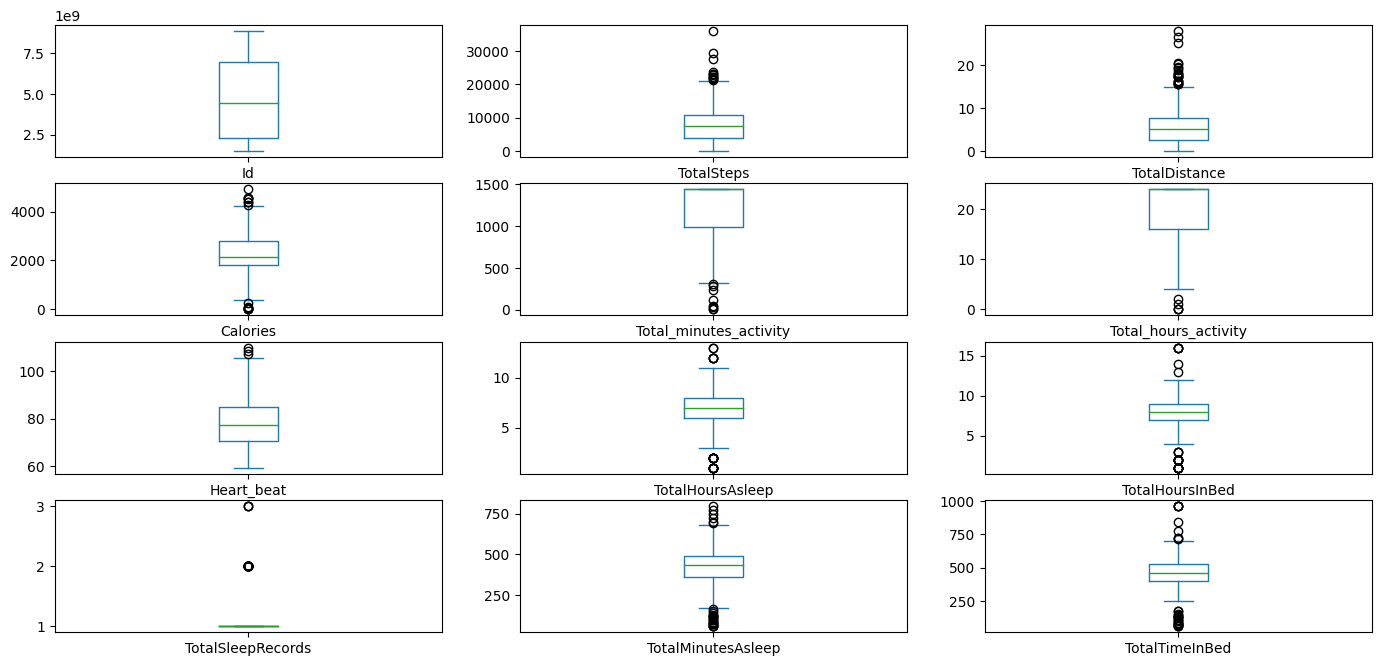

In [219]:
df4.plot(kind='box', subplots=True, layout=(6,3), figsize=(17,12))
plt.show()

There are some outliers in every columns, focusing on total steps - total distance &  also in the calories

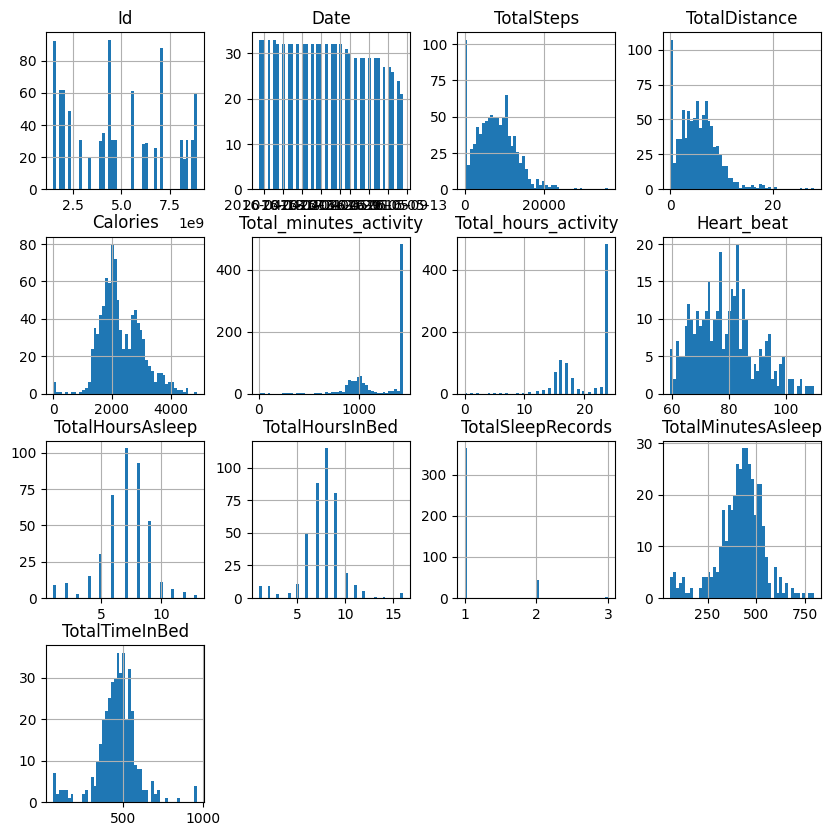

In [220]:
df4.hist(bins=50, figsize=(10,10))
plt.show()

Total step and total distanc, heart beat positive distributions, right skewed, total hours activity: negative, left skewed.

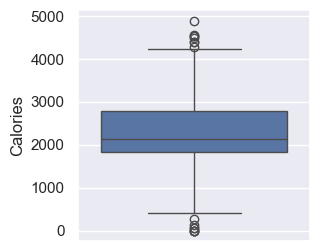

In [221]:
sns.set(rc={"figure.figsize":(3, 3)})
sns.boxplot(y=df4['Calories'])
plt.show()

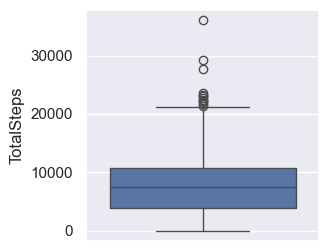

In [222]:
sns.set(rc={"figure.figsize":(3, 3)})
sns.boxplot(y=df4['TotalSteps'])
plt.show()

Checking average values sorted by calories -> no extreme values per day, the range is between 2199 - 2356

In [223]:
df4['Calories'].mean()

2303.609574468085

In [224]:
avg_calories_daily = round(df4.groupby('ActivityDate_day')[['Calories', 'TotalSteps', 'TotalDistance']].mean()\
.reset_index()\
.rename(columns = {'Calories':'Average_burnt_calories', 
                   'TotalSteps' : 'Average_steps', 
                   'TotalDistance':'Average_distance'})\
.sort_values(by ='Average_burnt_calories',ascending=False)\
.reset_index(drop=True))

In [225]:
avg_calories_daily

,ActivityDate_day,Average_burnt_calories,Average_steps,Average_distance
0,Tuesday,2356.0,8125.0,6.0
1,Saturday,2355.0,8153.0,6.0
2,Friday,2332.0,7448.0,5.0
3,Monday,2324.0,7781.0,6.0
4,Wednesday,2303.0,7559.0,5.0
5,Sunday,2263.0,6933.0,5.0
6,Thursday,2200.0,7406.0,5.0


checkign average steps per user

In [226]:
df4['TotalSteps'].mean()

7637.9106382978725

In [227]:
avg_steps_per_user = round(daily_activity.groupby('Id')[['TotalSteps', 'Calories', 'TotalDistance']].mean()\
.reset_index()\
.rename(columns = {'TotalSteps' : 'Average_steps',
                  'Calories':'Average_burnt_calories',  
                 'TotalDistance':'Average_distance'})\
.sort_values(by ='Average_steps',ascending=False)\
.reset_index(drop=True))

In [228]:
avg_steps_per_user.head(5)

,Id,Average_steps,Average_burnt_calories,Average_distance
0,8877689391,16040.0,3420.0,13.0
1,8053475328,14763.0,2946.0,11.0
2,1503960366,12117.0,1816.0,8.0
3,2022484408,11371.0,2510.0,8.0
4,7007744171,11323.0,2544.0,8.0


In [229]:
above_10000 = avg_steps_per_user[avg_steps_per_user['Average_steps'] > 10000]

In [230]:
above_10000.count()

Id                        7
Average_steps             7
Average_burnt_calories    7
Average_distance          7
dtype: int64

The average calories of the 33 users is between cca 916 - 16 000 --> 
there are 7 women with average of 10 000, 21%

In [231]:
avg_calories_per_user = round(df4.groupby('Id')[['Calories', 'TotalSteps', 'TotalDistance']].mean()\
.reset_index()\
.rename(columns = {'Calories':'Average_burnt_calories',
                   'TotalSteps' : 'Average_steps',
                 'TotalDistance':'Average_distance'})\
.sort_values(by ='Average_burnt_calories',ascending=False)\
.reset_index(drop=True))

In [232]:
avg_calories_per_user.head(33).head()

,Id,Average_burnt_calories,Average_steps,Average_distance
0,8378563200,3437.0,8718.0,7.0
1,8877689391,3420.0,16040.0,13.0
2,5577150313,3360.0,8304.0,6.0
3,4388161847,3094.0,10814.0,8.0
4,4702921684,2966.0,8572.0,7.0


In [233]:
above_1800 = avg_calories_per_user[avg_calories_per_user['Average_burnt_calories'] >1800]

In [234]:
above_1800.count()

Id                        27
Average_burnt_calories    27
Average_steps             27
Average_distance          27
dtype: int64

The average calories of the 33 users is between cca 1500 - 3500 during this period - for woman daily  1800 calories, and 27 of the 33 users has the average calorie above 1800 calories --> 81%

Text(0, 0.5, 'Average steps')

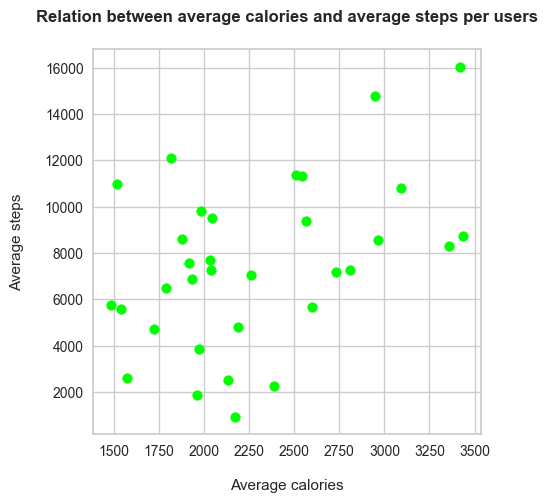

In [286]:
avg_cal = avg_calories_per_user['Average_burnt_calories']
avg_step = avg_calories_per_user['Average_steps']

plt.figure(figsize=(5,5))
plt.scatter(avg_cal, avg_step, color='lime')
plt.title('Relation between average calories and average steps per users', fontdict={'size': 12, 'weight': 'bold'}, pad=20)
plt.xlabel('Average calories', labelpad=15)
plt.ylabel('Average steps', labelpad=15)


Text(0, 0.5, 'Total steps')

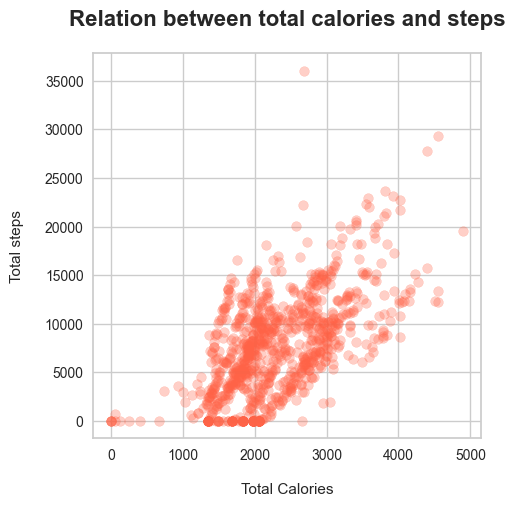

In [287]:
daily_cal = df4['Calories']
daily_step = df4['TotalSteps']

plt.figure(figsize=(5,5))
plt.scatter(daily_cal, daily_step, alpha  = 0.3, color='tomato')
plt.title('Relation between total calories and steps', fontdict={'size': 16, 'weight': 'bold'}, pad=20)
plt.xlabel('Total Calories', labelpad=15)
plt.ylabel('Total steps', labelpad=15)

checking the days

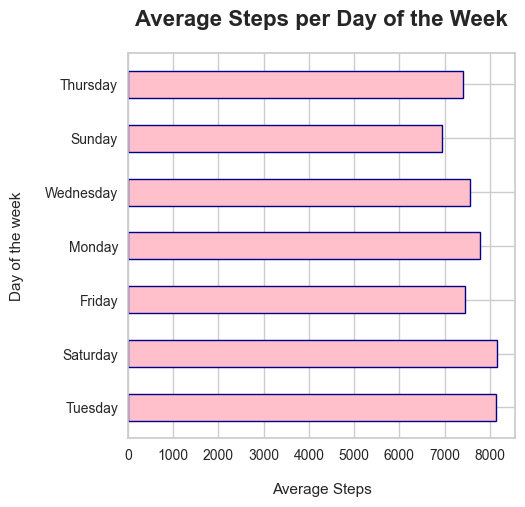

In [288]:
x = avg_calories_daily['ActivityDate_day'] 
y = avg_calories_daily['Average_steps']

plt.figure(figsize=(5,5)) 
plt.barh(x, y, color='pink', height=0.5, edgecolor='darkblue', linewidth=1)  
plt.xlabel('Average Steps', labelpad=15)
plt.ylabel('Day of the week', labelpad=15)
plt.title('Average Steps per Day of the Week', fontdict={'size': 16, 'weight': 'bold'}, pad=20)

plt.show()


<Figure size 400x300 with 0 Axes>

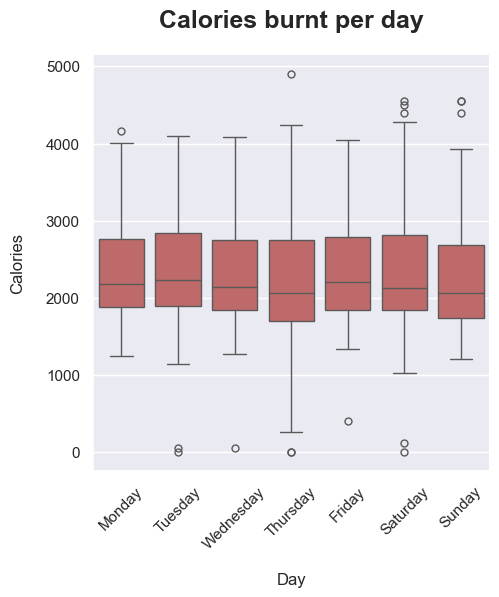

In [238]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", 'Saturday', 'Sunday']

plt.figure(figsize=(4, 3)) 

sns.catplot(x= "ActivityDate_day",
            y= "Calories",
            data = df4,
            kind = 'box',
            color='indianred',
           order = day_order)

plt.xticks(x, rotation=45)

plt.title('Calories burnt per day', pad=20, fontdict={'size': 18, 'weight': 'bold'})
plt.xlabel('Day', labelpad=15)
plt.ylabel('Calories', labelpad=15)

plt.show()


<Figure size 400x300 with 0 Axes>

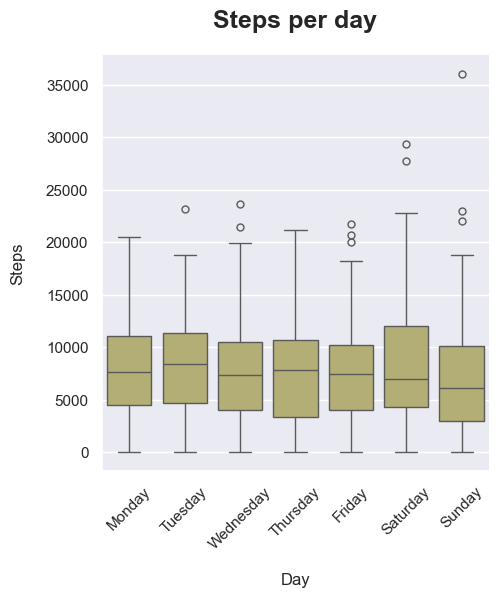

In [239]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", 'Saturday', 'Sunday']

plt.figure(figsize=(4, 3)) 

sns.catplot(x= "ActivityDate_day",
            y= "TotalSteps",
            data = df4,
            kind = 'box',
            color='darkkhaki',
           order = day_order)

plt.xticks(x, rotation=45)

plt.title('Steps per day', pad=20, fontdict={'size': 18, 'weight': 'bold'})
plt.xlabel('Day', labelpad=15)
plt.ylabel('Steps', labelpad=15)

plt.show()

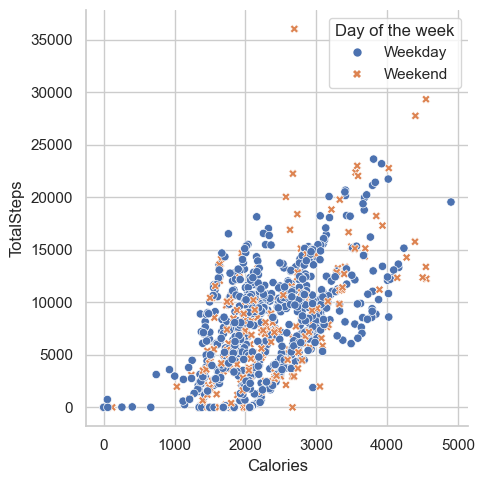

In [240]:
sns.set(style="whitegrid")

g = sns.relplot(x="Calories", y="TotalSteps", 
                data=df4,
                kind="scatter", 
                style='Day_of_the_week', 
                hue='Day_of_the_week',
                markers=True,
                dashes=False,
                facet_kws={'legend_out': False}  # This will move the legend inside the plot
                )

g._legend.set_title("Day of the week")

plt.show()

So generally it is true that the more steps are taken, the more calories burnt. The outliers above the average are on the weekends, but since during the weekdays there are outliers below the average, therfore it does not effect too much the mean of the calories and steps. 

checking and adding new columns and reordering

In [299]:
df4_main = df4.copy()

In [300]:
df4_main = pd.get_dummies(df4_main, columns=['Day_of_the_week'])

In [301]:
df4_main.columns

Index(['Id', 'Date', 'ActivityDate_day', 'TotalSteps', 'TotalDistance',
       'Calories', 'Total_minutes_activity', 'Total_hours_activity',
       'Heart_beat', 'Heart_rate_merge', 'TotalHoursAsleep', 'TotalHoursInBed',
       'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed',
       'sleep_day_merge', 'Day_of_the_week_Weekday',
       'Day_of_the_week_Weekend'],
      dtype='object')

Checking the correlation between the main variables

In [302]:
df4_main = df4_main[['Calories', 'TotalSteps','Heart_beat','TotalHoursAsleep', 'Day_of_the_week_Weekday','Day_of_the_week_Weekend' ]]

In [303]:
df4_main

,Calories,TotalSteps,Heart_beat,TotalHoursAsleep,Day_of_the_week_Weekday,Day_of_the_week_Weekend
0,1985,13162,NaN,5.0,True,False
1,1797,10735,NaN,6.0,True,False
2,1776,10460,NaN,NaN,True,False
3,1745,9762,NaN,7.0,True,False
4,1863,12669,NaN,6.0,False,True
...,...,...,...,...,...,...
938,2847,10686,72.550523,NaN,False,True
939,3710,20226,89.615738,NaN,True,False
940,2832,10733,71.544377,NaN,True,False
941,3832,21420,89.149122,NaN,True,False


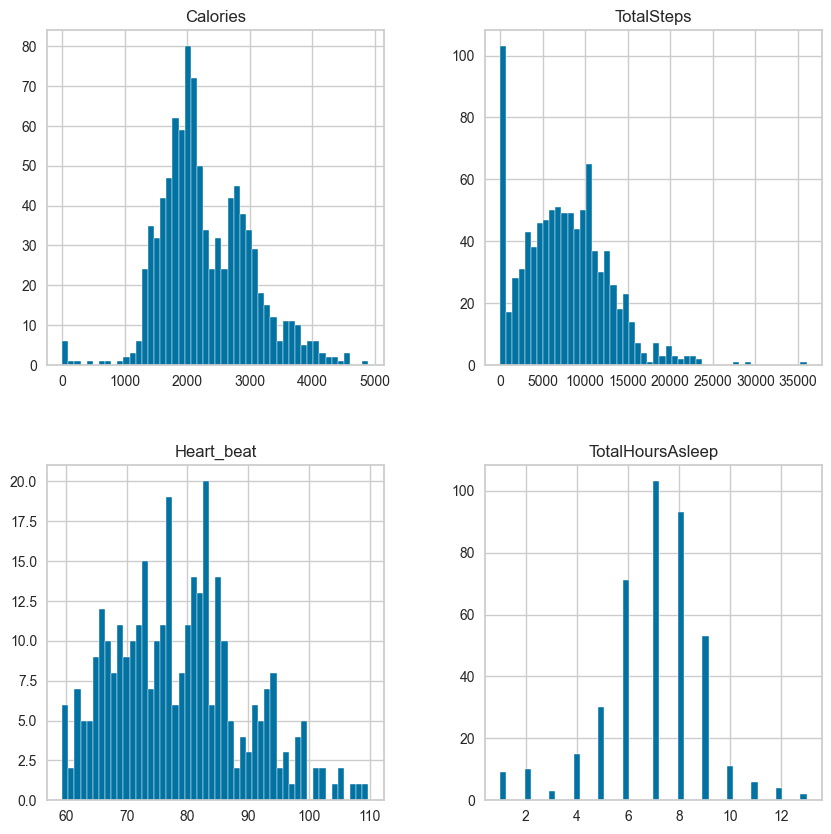

In [304]:
df4_main.hist(bins=50, figsize=(10,10))
plt.show()

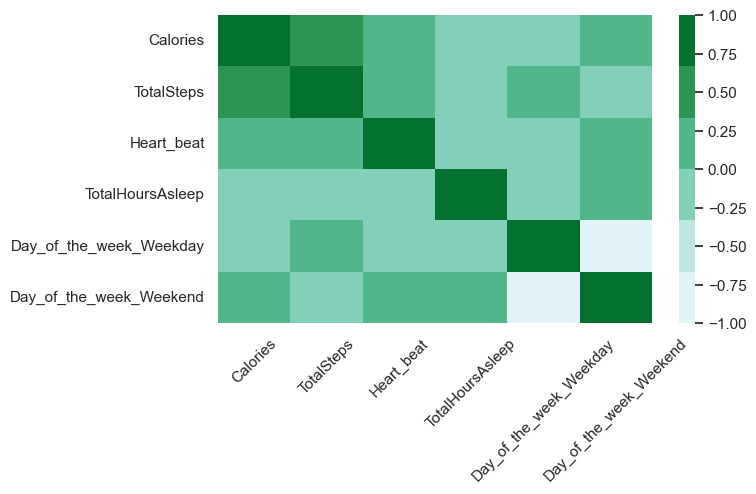

In [246]:
sns.set(rc={"figure.figsize":(7, 4)}) 
colormap = sns.color_palette(palette='BuGn')
sns.set(font_scale = 1.0)

ax=sns.heatmap(df4_main.corr(), fmt='.1g', cmap=colormap)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

In [247]:
corr = round(df4_main.corr(),3)

In [248]:
corr

,Calories,TotalSteps,Heart_beat,TotalHoursAsleep,Day_of_the_week_Weekday,Day_of_the_week_Weekend
Calories,1.000,0.592,0.111,-0.047,-0.005,0.005
TotalSteps,0.592,1.000,0.169,-0.188,0.010,-0.010
Heart_beat,0.111,0.169,1.000,-0.240,-0.077,0.077
TotalHoursAsleep,-0.047,-0.188,-0.240,1.000,-0.080,0.080
Day_of_the_week_Weekday,-0.005,0.010,-0.077,-0.080,1.000,-1.000
Day_of_the_week_Weekend,0.005,-0.010,0.077,0.080,-1.000,1.000


In [249]:
df4_main.columns

Index(['Calories', 'TotalSteps', 'Heart_beat', 'TotalHoursAsleep',
       'Day_of_the_week_Weekday', 'Day_of_the_week_Weekend'],
      dtype='object')

### Machine learning relationship : Catboost handles null values and categorical values ###

In [250]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

In [251]:
X = df4_main.drop('Calories', axis=1)

In [252]:
y = df4_main['Calories']

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [254]:
model = CatBoostRegressor()

In [255]:
model.fit(X_train, y_train)

Learning rate set to 0.03914
0:	learn: 716.1673025	total: 112ms	remaining: 1m 52s
1:	learn: 707.4908258	total: 113ms	remaining: 56.5s
2:	learn: 698.3366166	total: 114ms	remaining: 37.9s
3:	learn: 691.1783755	total: 115ms	remaining: 28.6s
4:	learn: 682.7372743	total: 116ms	remaining: 23s
5:	learn: 675.5437553	total: 117ms	remaining: 19.3s
6:	learn: 669.2811285	total: 117ms	remaining: 16.7s
7:	learn: 662.5840335	total: 118ms	remaining: 14.7s
8:	learn: 656.6610994	total: 119ms	remaining: 13.1s
9:	learn: 650.2119343	total: 120ms	remaining: 11.9s
10:	learn: 644.5387216	total: 121ms	remaining: 10.9s
11:	learn: 638.6992496	total: 122ms	remaining: 10s
12:	learn: 633.3779204	total: 123ms	remaining: 9.32s
13:	learn: 627.5961389	total: 124ms	remaining: 8.7s
14:	learn: 622.8975278	total: 124ms	remaining: 8.17s
15:	learn: 618.9814730	total: 125ms	remaining: 7.7s
16:	learn: 614.8713420	total: 126ms	remaining: 7.29s
17:	learn: 611.1001611	total: 126ms	remaining: 6.9s
18:	learn: 607.6415815	total: 127

312:	learn: 451.2530670	total: 374ms	remaining: 822ms
313:	learn: 451.2166936	total: 375ms	remaining: 820ms
314:	learn: 450.9143498	total: 377ms	remaining: 819ms
315:	learn: 450.5537346	total: 378ms	remaining: 817ms
316:	learn: 450.1048825	total: 379ms	remaining: 816ms
317:	learn: 449.8699377	total: 380ms	remaining: 814ms
318:	learn: 449.7913247	total: 381ms	remaining: 812ms
319:	learn: 449.6349081	total: 381ms	remaining: 811ms
320:	learn: 449.5964849	total: 382ms	remaining: 809ms
321:	learn: 449.4159884	total: 383ms	remaining: 807ms
322:	learn: 449.2270819	total: 384ms	remaining: 805ms
323:	learn: 448.7500999	total: 385ms	remaining: 804ms
324:	learn: 448.5831435	total: 386ms	remaining: 802ms
325:	learn: 448.3303819	total: 387ms	remaining: 800ms
326:	learn: 448.2381799	total: 388ms	remaining: 798ms
327:	learn: 448.1475198	total: 389ms	remaining: 797ms
328:	learn: 447.9838613	total: 390ms	remaining: 795ms
329:	learn: 447.8832216	total: 391ms	remaining: 793ms
330:	learn: 447.8355927	tota

495:	learn: 419.5859980	total: 555ms	remaining: 564ms
496:	learn: 419.3368927	total: 557ms	remaining: 563ms
497:	learn: 418.9757417	total: 558ms	remaining: 562ms
498:	learn: 418.8737945	total: 559ms	remaining: 561ms
499:	learn: 418.8113202	total: 560ms	remaining: 560ms
500:	learn: 418.6045201	total: 561ms	remaining: 558ms
501:	learn: 418.3738030	total: 562ms	remaining: 557ms
502:	learn: 418.2699837	total: 563ms	remaining: 556ms
503:	learn: 417.9479375	total: 564ms	remaining: 555ms
504:	learn: 417.6925361	total: 565ms	remaining: 554ms
505:	learn: 417.5884326	total: 566ms	remaining: 553ms
506:	learn: 417.3084277	total: 567ms	remaining: 552ms
507:	learn: 417.0224188	total: 568ms	remaining: 551ms
508:	learn: 416.9769755	total: 570ms	remaining: 550ms
509:	learn: 416.8001565	total: 571ms	remaining: 549ms
510:	learn: 416.6757316	total: 572ms	remaining: 547ms
511:	learn: 416.6100882	total: 573ms	remaining: 546ms
512:	learn: 416.4177853	total: 574ms	remaining: 545ms
513:	learn: 416.2854576	tota

660:	learn: 396.0062543	total: 733ms	remaining: 376ms
661:	learn: 396.0030691	total: 734ms	remaining: 375ms
662:	learn: 395.9556869	total: 735ms	remaining: 374ms
663:	learn: 395.9285548	total: 736ms	remaining: 373ms
664:	learn: 395.7237560	total: 737ms	remaining: 371ms
665:	learn: 395.6624826	total: 738ms	remaining: 370ms
666:	learn: 395.5153983	total: 739ms	remaining: 369ms
667:	learn: 395.3664749	total: 740ms	remaining: 368ms
668:	learn: 395.1970142	total: 741ms	remaining: 366ms
669:	learn: 395.1921582	total: 742ms	remaining: 365ms
670:	learn: 395.0561457	total: 742ms	remaining: 364ms
671:	learn: 394.8576855	total: 743ms	remaining: 363ms
672:	learn: 394.7292638	total: 744ms	remaining: 362ms
673:	learn: 394.5868247	total: 745ms	remaining: 360ms
674:	learn: 394.4639581	total: 746ms	remaining: 359ms
675:	learn: 394.3667782	total: 747ms	remaining: 358ms
676:	learn: 394.1849261	total: 748ms	remaining: 357ms
677:	learn: 394.1019316	total: 749ms	remaining: 356ms
678:	learn: 394.0263539	tota

848:	learn: 376.1717877	total: 912ms	remaining: 162ms
849:	learn: 376.1459333	total: 914ms	remaining: 161ms
850:	learn: 376.0355706	total: 915ms	remaining: 160ms
851:	learn: 375.9614188	total: 917ms	remaining: 159ms
852:	learn: 375.9111713	total: 918ms	remaining: 158ms
853:	learn: 375.8009884	total: 919ms	remaining: 157ms
854:	learn: 375.7872209	total: 919ms	remaining: 156ms
855:	learn: 375.7689453	total: 920ms	remaining: 155ms
856:	learn: 375.7017357	total: 921ms	remaining: 154ms
857:	learn: 375.6662015	total: 922ms	remaining: 153ms
858:	learn: 375.5622271	total: 923ms	remaining: 152ms
859:	learn: 375.5083437	total: 924ms	remaining: 150ms
860:	learn: 375.4633065	total: 926ms	remaining: 149ms
861:	learn: 375.3988438	total: 927ms	remaining: 148ms
862:	learn: 375.1831927	total: 928ms	remaining: 147ms
863:	learn: 375.0921034	total: 929ms	remaining: 146ms
864:	learn: 375.0334076	total: 930ms	remaining: 145ms
865:	learn: 374.9864742	total: 931ms	remaining: 144ms
866:	learn: 374.9402208	tota

In [256]:
feature_importance = model.get_feature_importance()
feature_name = model.feature_names_

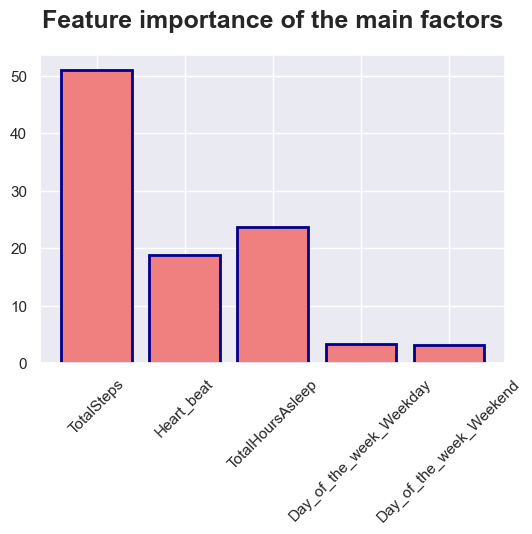

In [257]:
plt.figure(figsize=(6,4)) 
plt.bar(feature_name, feature_importance, color='lightcoral', edgecolor='darkblue', linewidth=2)
plt.title('Feature importance of the main factors', fontdict={'size': 18, 'weight': 'bold'}, pad= 20)
plt.xticks(feature_name, rotation=45)
plt.show()

In [258]:
y_pred = model.predict(X_test)

In [260]:
r2_score(y_test ,y_pred)

0.3951902306508819

Since the r2score is 0,4 which is quite low, let's reach out to other models and check if there is a better model

In [261]:
from pycaret.regression import *

In [262]:
Step = setup(data=df4_main, target='Calories')

,Description,Value
0,Session id,8123
1,Target,Calories
2,Target type,Regression
3,Original data shape,"(940, 6)"
4,Transformed data shape,"(940, 6)"
5,Transformed train set shape,"(658, 6)"
6,Transformed test set shape,"(282, 6)"
7,Numeric features,3
8,Rows with missing values,80.7%
9,Preprocess,True


In [263]:
best_models = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,411.6689,293041.2543,534.2651,0.4132,0.4025,0.2976,0.7490
lightgbm,Light Gradient Boosting Machine,415.3518,298468.2335,540.1821,0.4033,0.4055,0.2975,0.0700
gbr,Gradient Boosting Regressor,429.5336,302854.1773,545.1782,0.3890,0.4052,0.3053,0.0290
rf,Random Forest Regressor,434.8760,330316.7316,570.2419,0.3325,0.4164,0.3093,0.0850
br,Bayesian Ridge,467.4974,335934.6595,576.9703,0.3162,0.4191,0.3253,0.0120
omp,Orthogonal Matching Pursuit,467.4462,335930.7385,576.9756,0.3161,0.4191,0.3251,0.0110
ada,AdaBoost Regressor,485.9547,337084.5142,577.7076,0.3157,0.4208,0.3232,0.0190
en,Elastic Net,469.8316,337158.6461,578.1184,0.3129,0.4201,0.3258,0.0110
lasso,Lasso Regression,470.6566,337818.4306,578.7162,0.3113,0.4205,0.3260,0.0100
llar,Lasso Least Angle Regression,470.6566,337818.4481,578.7162,0.3113,0.4205,0.3260,0.0100


Catboost is the best model, the others are providing worse results

In [264]:
catboost = create_model("catboost")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,380.3094,237416.4836,487.2540,0.5217,0.2010,0.1667
1,319.9593,155458.6818,394.2825,0.6854,0.1645,0.1412
2,393.0997,243070.6763,493.0220,0.3626,0.2054,0.1633
3,399.2356,282933.5218,531.9150,0.3221,0.2230,0.1706
4,337.8134,196841.7946,443.6686,0.5142,0.2064,0.1577
5,417.2004,275463.6735,524.8463,0.2813,0.2395,0.2090
6,452.1549,339444.5923,582.6187,0.2872,0.4798,0.6406
7,490.7988,395363.5549,628.7794,0.3111,1.0052,0.4146
8,520.4661,512157.1825,715.6516,0.3402,1.0549,0.7149


Finding the best parameters

In [265]:
catboost_tuned = tune_model(catboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,380.9708,229377.2749,478.9335,0.5379,0.1964,0.1673
1,343.1594,191589.0831,437.7089,0.6123,0.1746,0.1476
2,410.2149,235934.4735,485.7309,0.3813,0.2025,0.1712
3,397.5195,275465.2455,524.8478,0.3400,0.2210,0.1697
4,349.1979,187608.8577,433.1384,0.5370,0.2024,0.1676
5,413.0321,254741.2451,504.7190,0.3354,0.2300,0.2038
6,433.9534,314888.2499,561.1490,0.3388,0.4733,0.6228
7,494.0468,374343.7430,611.8364,0.3477,1.0006,0.4196
8,518.1372,474603.4286,688.9147,0.3886,1.0545,0.7091


Fitting 10 folds for each of 10 candidates, totalling 100 fits


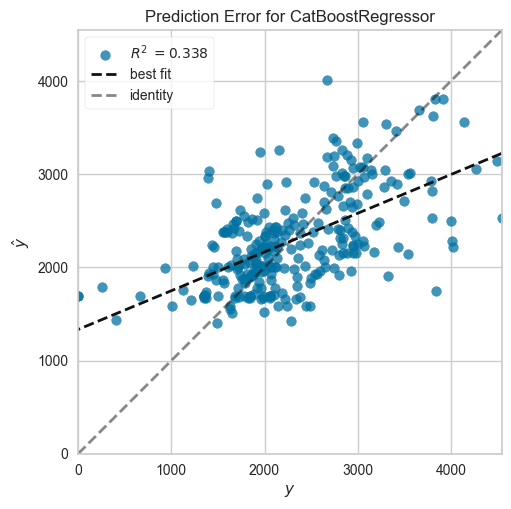

In [266]:
plot_model(catboost, plot='error')

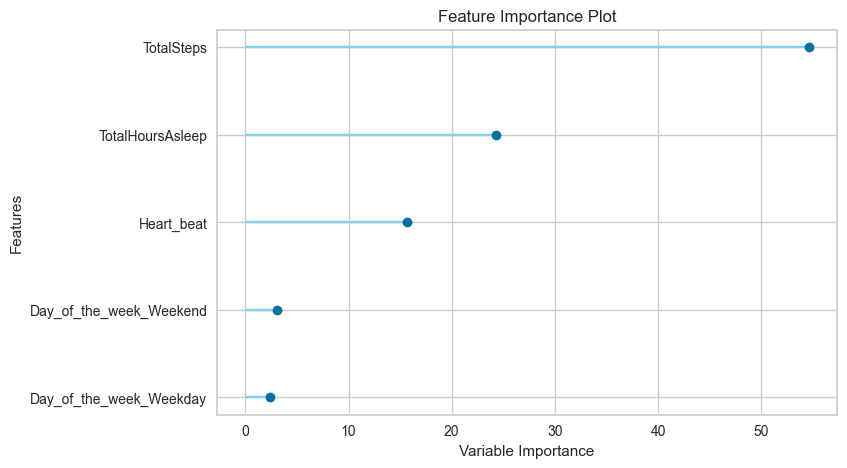

In [267]:
plot_model(catboost, plot='feature')

In [268]:
df5 = df4[['Calories', 'TotalSteps', 'TotalDistance', 'Total_hours_activity', 'Heart_beat', 'TotalHoursAsleep', 'TotalHoursInBed']]

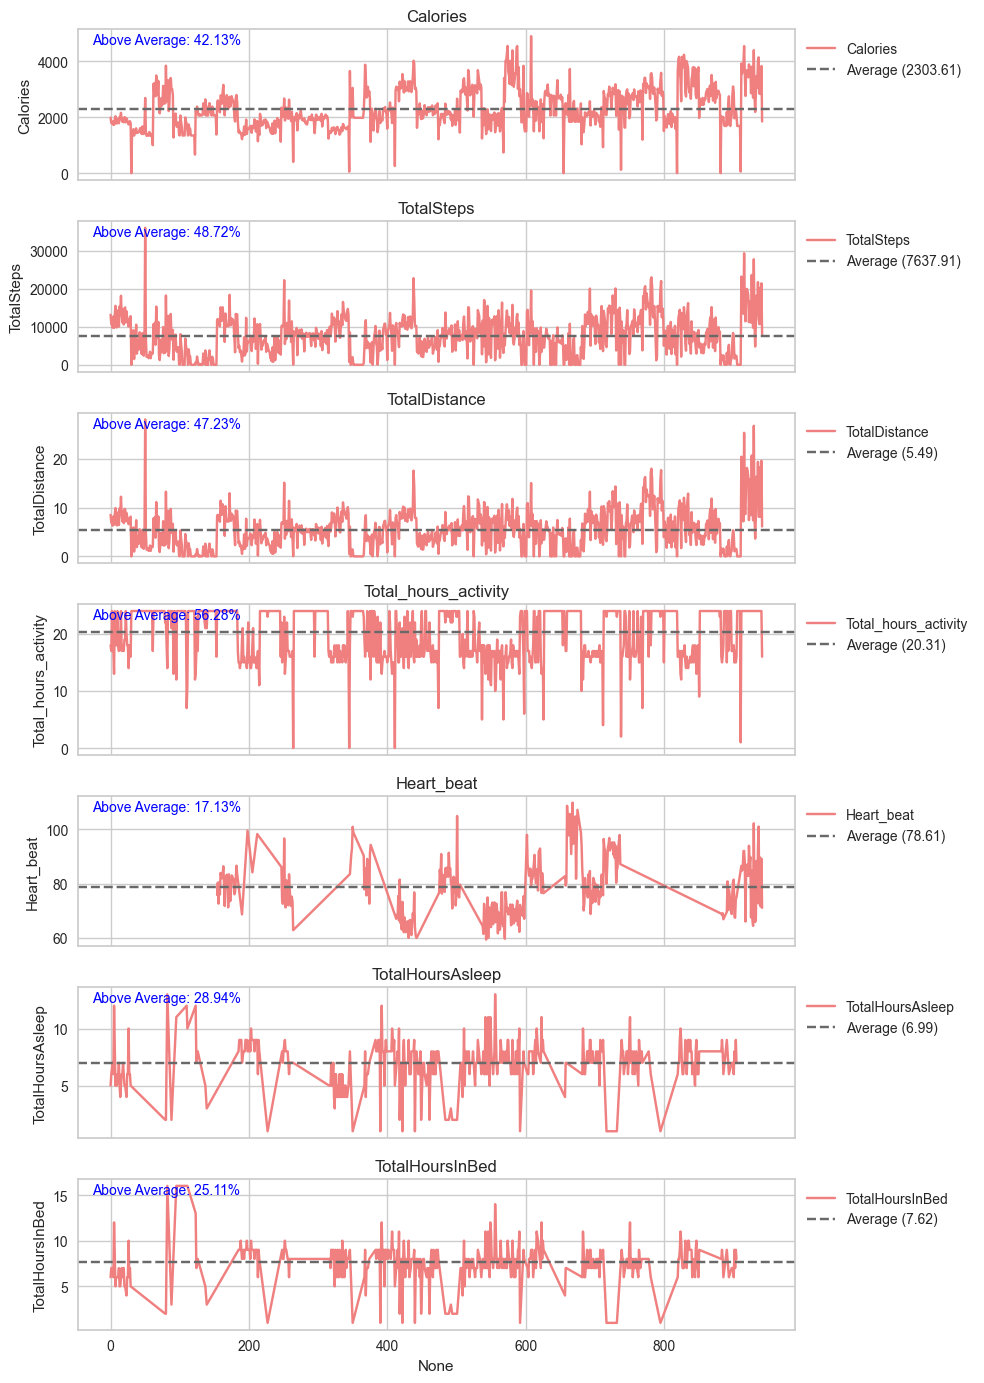

In [269]:
fig, axes = plt.subplots(nrows=len(df5.columns), ncols=1, figsize=(10, 2 * len(df5.columns)), sharex=True)


for i, column in enumerate(df5.columns):
    sns.lineplot(x=df5.index, y=df5[column], ax=axes[i], label=column, color='lightcoral')
    
    average_value = df5[column].mean()
    axes[i].axhline(y=average_value, color='dimgrey', linestyle='--', label=f'Average ({average_value:.2f})')
    percentage_above_average = (df4[column] > average_value).mean() * 100
    
    axes[i].annotate(f'Above Average: {percentage_above_average:.2f}%', xy=(0.02, 0.90),
                     xycoords='axes fraction', fontsize=10, color='blue')
    
    axes[i].set_title(column)
    axes[i].set_ylabel(column) # loc='bottom'

    axes[i].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

Visalization for the ratio of minutes and distances

In [270]:
df4

,Id,Date,ActivityDate_day,Day_of_the_week,TotalSteps,TotalDistance,Calories,Total_minutes_activity,Total_hours_activity,Heart_beat,Heart_rate_merge,TotalHoursAsleep,TotalHoursInBed,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,sleep_day_merge
0,1503960366,2016-04-12,Tuesday,Weekday,13162,8.500000,1985,1094,18.0,NaN,heart_rate_only,5.0,6.0,2016-04-12,1.0,327.0,346.0,df3_and_sleep_day
1,1503960366,2016-04-13,Wednesday,Weekday,10735,6.970000,1797,1033,17.0,NaN,heart_rate_only,6.0,7.0,2016-04-13,2.0,384.0,407.0,df3_and_sleep_day
2,1503960366,2016-04-14,Thursday,Weekday,10460,6.740000,1776,1440,24.0,NaN,heart_rate_only,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
3,1503960366,2016-04-15,Friday,Weekday,9762,6.280000,1745,998,17.0,NaN,heart_rate_only,7.0,7.0,2016-04-15,1.0,412.0,442.0,df3_and_sleep_day
4,1503960366,2016-04-16,Saturday,Weekend,12669,8.160000,1863,1040,17.0,NaN,heart_rate_only,6.0,6.0,2016-04-16,2.0,340.0,367.0,df3_and_sleep_day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,8877689391,2016-05-08,Sunday,Weekend,10686,8.110000,2847,1440,24.0,72.550523,daily_act_and_heart_rate,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
939,8877689391,2016-05-09,Monday,Weekday,20226,18.250000,3710,1440,24.0,89.615738,daily_act_and_heart_rate,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
940,8877689391,2016-05-10,Tuesday,Weekday,10733,8.150000,2832,1440,24.0,71.544377,daily_act_and_heart_rate,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only
941,8877689391,2016-05-11,Wednesday,Weekday,21420,19.559999,3832,1440,24.0,89.149122,daily_act_and_heart_rate,NaN,NaN,NaN,NaN,NaN,NaN,sleep_day_only


In [271]:
minutes = ['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']

minutes_sum = pd.DataFrame({
    'Column': minutes,
    'TotalSum': daily_activity_minutes[minutes].sum()
}).reset_index()

print(minutes_sum)


                  index                Column  TotalSum
0     VeryActiveMinutes     VeryActiveMinutes     19895
1   FairlyActiveMinutes   FairlyActiveMinutes     12751
2  LightlyActiveMinutes  LightlyActiveMinutes    181244
3      SedentaryMinutes      SedentaryMinutes    931738


In [272]:
categories_minutes = ['Very active', 'Fairly active', 'Light Active', 'Sedentary']

In [273]:
values_min = [19895, 12751, 181244, 931738]

In [274]:
explodes_min = [0.2, 0, 0, 0]

In [275]:
colors_min = ['teal', 'lightgreen', 'gray', 'lightpink']

### study this code!!!

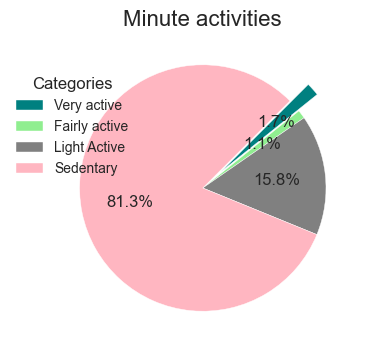

In [276]:
categories_minutes = ['Very active', 'Fairly active', 'Light Active', 'Sedentary']
values_min = [19895, 12751, 181244, 931738]
explodes_min = [0.2, 0, 0, 0]
colors_min = ['teal', 'lightgreen', 'gray', 'lightpink']

fig, ax = plt.subplots(figsize=(4, 4))

wedges, texts, autotexts = ax.pie(values_min, explode=explodes_min, colors=colors_min, autopct='%1.1f%%', startangle=45, counterclock=False)

for text, autotext in zip(texts, autotexts):
    text.set(size=13)  
    autotext.set(size=12)  

ax.legend(wedges, categories_minutes, title='Categories', loc='lower right', bbox_to_anchor=(0.3, 0.5))

plt.title('Minute activities', fontsize=16)

plt.show()



In [277]:
distances = ['VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance']

distances_sum = pd.DataFrame({
    'Column': distances,
    'TotalSum': daily_activity_distances[distances].sum()
})

print(distances_sum)

                                            Column     TotalSum
VeryActiveDistance              VeryActiveDistance  1412.520000
ModeratelyActiveDistance  ModeratelyActiveDistance   533.489998
LightActiveDistance            LightActiveDistance  3140.370000
SedentaryActiveDistance    SedentaryActiveDistance     1.510000


In [278]:
categories_distance = ['Very Active ', 'Moderately Active', 'Light Active', 'Sedentary Active']

In [279]:
values_dis = [1412, 533, 3140, 1.5]

In [280]:
colors_dis = ['darkgrey', 'seagreen', 'coral', 'navy']

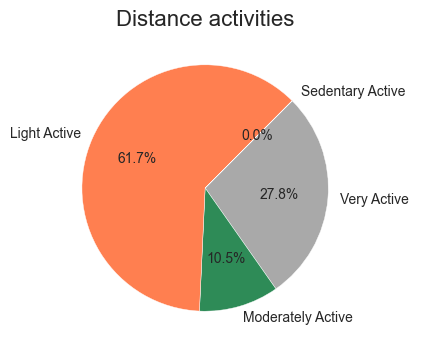

In [281]:
plt.subplots(figsize=(4, 4))
wedgesd, textsd, autotextsd = plt.pie(values_dis,labels=categories_distance, colors = colors_dis, autopct='%1.1f%%', startangle=45, counterclock=False)

for text, autotext in zip(textsd, autotextsd):
    text.set(size=10)  
    autotext.set(size=10)

ax.legend(wedgesd, categories_distance, title='Categories', loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Distance activities', fontsize=16)

plt.show()